In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[12/20/24 16:08:40] INFO     Resolved project path as:                                              ]8;id=709212;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=559442;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/20/24 16:08:40] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=530801;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=372175;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=725991;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=413958;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=801175;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=662430;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[12/20/24 16:08:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=584207;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=363306;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=907937;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=418234;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=51407;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=408321;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=394481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=238356;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/20/24 16:08:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=970316;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=663546;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=750094;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=522032;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=846280;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=611577;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=755722;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=402941;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [7]:
params1= catalog.list
params= catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=409229;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=502692;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### models:

In [60]:
info_save_all = catalog.load('info_save_all')

                    INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=578617;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=911859;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\


KeyboardInterrupt



In [ ]:
info_save_all.keys()

info_save_all2 = info_save_all.copy()
for col in info_save_all.keys():
    if isinstance(col, int) and ('grid_search' not in info_save_all[col].keys()):
        del info_save_all2[col]

print(info_save_all2.keys())
print(info_save_all.keys())
info_save_last_all = models.evaluate_models_for_all(info_save_all2, params)
info_save_all_correct = models.compare_metrics_models(info_save_last_all, params)
print(info_save_all_correct.keys())

import pickle
import boto3
from io import BytesIO

# Configura el cliente de S3 (asegúrate de tener configuradas las credenciales de AWS)
s3_client = boto3.client('s3')

# Serializa el objeto en memoria (sin necesidad de archivo local)
pickle_buffer = BytesIO()
pickle.dump(info_save_all_correct, pickle_buffer)
pickle_buffer.seek(0)  # Vuelve al principio del buffer después de serializar


# Define el nombre del bucket y la ruta en S3
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_key = 'casos-uso/fabrica-personas/AH/06-models/info_save_all.pickle'

# Sube el archivo pickle a S3
s3_client.upload_fileobj(pickle_buffer, bucket_name, s3_key)

print("Object has been pickled and uploaded to S3.")

In [ ]:
for i in range(12):
    display(info_save_all[i]['Muestreo_tipo'])

In [ ]:
# con eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

In [ ]:
# sin eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

In [ ]:
# con EDA
info_temp = models.compare_metrics_models(info_save_all,params)

In [ ]:
# sin EDA
info_temp = models.compare_metrics_models(info_save_all,params)

In [ ]:
# con EDA
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df

In [ ]:
pct = 0.75

In [ ]:
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)

In [ ]:
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)

In [ ]:
df_metrics_test[df_metrics_test['model_name'].isin(names)]

In [ ]:
df_metrics_train[df_metrics_train['model_name'].isin(names)]

In [ ]:
info_save_all['best_model_metrics_dataset']

In [ ]:
# sin EDA
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

## model_selection

In [ ]:
## algoritmo best_model_name unico:

In [ ]:
info_save_select_ini = catalog.load('info_save_select_best') # best model unico

In [ ]:
check_df = info_save_select_ini['select_model2']
check_df = check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])].reset_index() 
check_df = check_df.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df

In [ ]:
info_save_select_mvp2 = catalog.load('info_save_select_mvp2') # best model unico

In [ ]:
check_df_mvp2 = info_save_select_mvp2['select_model2']
check_df_mvp2 = check_df_mvp2[np.in1d(check_df_mvp2.index.get_level_values(1),['backtest'])].reset_index() 
check_df_mvp2 = check_df_mvp2.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_mvp2

In [ ]:
params['Ensamble']['want'] = True
params['optimizacion_bayesiana']['want'] = False
params['Ensamble']['Algoritmos'] = ensamble
params['Ensamble']['weights'] = weightss

In [ ]:
params['n_obs_filter']

In [ ]:
params['use_key']

In [ ]:
params['Ensamble']

In [ ]:
info_save_temp=ms.generate_modelo_produccion(info_save_all, params)

In [ ]:
info_save2=ms.calc_metrics_before_backtesting(info_save_all, info_save_temp,params)

In [ ]:
# con eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest'])].reset_index() 
check_df_cientifico = check_df_cientifico.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_cientifico

In [ ]:
# sin eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest'])].reset_index()
check_df_cientifico = check_df_cientifico.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_cientifico

In [ ]:
# ks en uno de los modeos del ensamble
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_train'].head())
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_test'].head())

# optimizar ensamblado

In [ ]:
train = info_save2['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
train.shape

test = info_save2['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

In [ ]:
best_probs = params['n_obs_filter']
best_probs = 0.2
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

In [ ]:
mejor_test_dado_mejores_train = True
ignore_train = False

In [ ]:
mejor_test_dado_mejores_train = False
ignore_train = True

In [ ]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = int(cpu_count()/2) # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
lopps_df = [train,test]
nulls = [drops,drops2]
if ignore_train == True:
    msj = ["test Data"]
    lopps_df = [test]
    nulls = [drops2]
df_model_unic = pd.DataFrame()

for t,df_select in enumerate(lopps_df):
    y_true = df_select[['y']]
    tot = int(y_true.shape[0]*best_probs)
    print("N TOP",tot,".EMPEZAMOS: ",msj[t])
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        if mejor_test_dado_mejores_train == True:
            weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        else:
            pass
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,4)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")

In [ ]:
1

In [ ]:
epochs_select = (epochs.loc[modelos_unicos]/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_unico = epochs_select.index[0]
print("Mejor modelo Unico")
display(combinaciones.loc[[mejor_unico]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select)
print("Cominaciones e ietraciones de modelos unicos")
display(combinaciones.loc[modelos_unicos])
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_unico,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_unico,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_unico,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

In [ ]:
epochs_select = (epochs/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_combinado = epochs_select.index[0]
print("Mejor modelo Iteraciones")
display(combinaciones.loc[[mejor_combinado]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select.head())
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_combinado,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_combinado,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_combinado,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

In [ ]:
# sin eda
iterr = [346,580,511,421,256] # test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

In [ ]:
# sin eda
iterr = [346,580,511,421,256] # test best in train
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

In [ ]:
# sin eda
iterr = [348,267,591,12,106,3] # train best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

In [ ]:
# sin eda
iterr2 = [348,267,591,12,106,3] # train best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

In [ ]:
# con eda
iterr = [81,171,163] # test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

In [ ]:
# con eda
iterr2 = [81,171,163] # train best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

In [ ]:
combinaciones_interes = list(set([mejor_unico]+iterr+iterr2))
rangos = sorted(list(set([params['n_obs_filter'],0.01,0.05,0.1,0.2,0.3])))
print('Iteracion: ',combinaciones_interes)
print('Calling: ',rangos)

In [ ]:
# sin eda
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

In [ ]:
# con eda
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

In [ ]:
# sin eda
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

In [ ]:
# con eda
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

In [ ]:
# sin eda
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [ ]:
# con eda
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [ ]:
# mejor modelo
check_df

In [ ]:
# MVP2
check_df_mvp2

In [ ]:
# ensamble sin optimizar
check_df_cientifico

In [ ]:
print(info_save2[3]['model_name'])
print(info_save2[3]['name_model'])

In [ ]:
info_save_select_ensamble = catalog.load("info_save_select_ensamble") # primer ensamble
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest'])].reset_index() 
check_df_opt = check_df_opt.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_opt

## backtesting

In [61]:
info_save_select = catalog.load("info_save_select") # dio mejor en el backtesting
#info_save_select = info_save_select_ensamblecopy()
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest'])].reset_index() 
check_df_opt = check_df_opt.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_opt

[12/16/24 14:39:20] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=132786;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=61419;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\


KeyboardInterrupt



In [ ]:
try:
    display(info_save_select["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)
    display(info_save_select["modelo_produccion"]['ks_test'])
    display(info_save_select["modelo_produccion"]['ks_train'])
except:
    display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['Scaler'].reindex_OneHotEncoding)

In [ ]:
print(info_save_select["modelo_produccion"]["model_name"])
print(info_save_select["modelo_produccion"]["name_model"])
if info_save_select["modelo_produccion"]["model_name"] == "Ensamble":
    print(info_save_select["modelo_produccion"]["nodos_select"])
    print(info_save_select["modelo_produccion"]["weights"])

In [8]:
save_backtesting = catalog.load("data_backtesting")

[12/16/24 17:56:50] INFO     Loading data from 'data_backtesting' (PickleDataSet)...            ]8;id=556895;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=921419;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

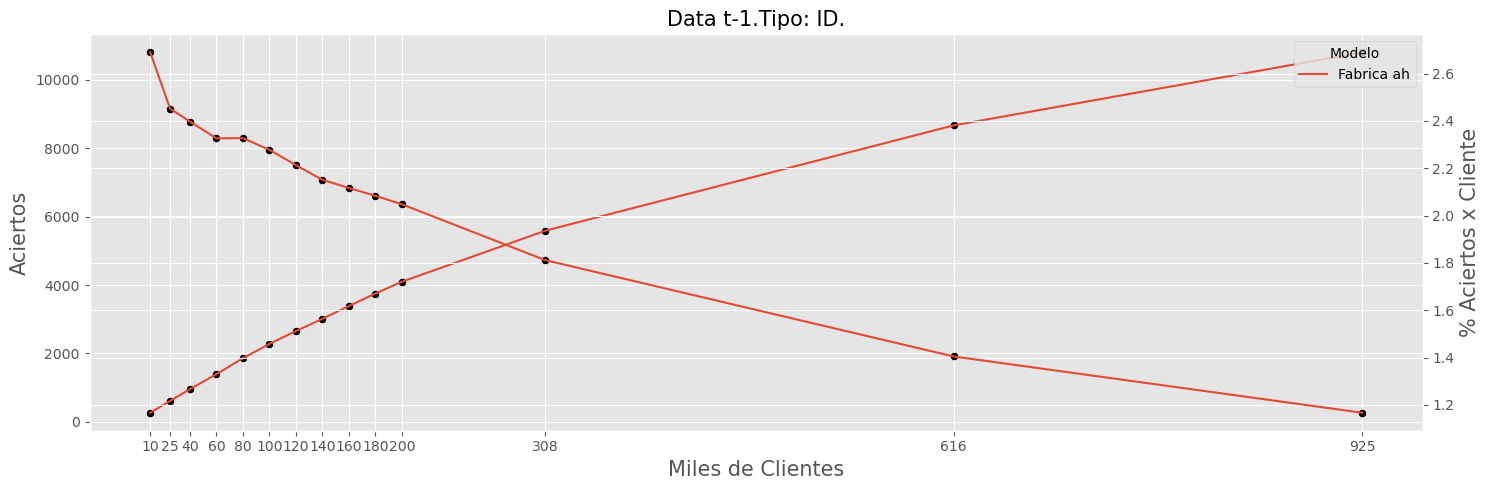

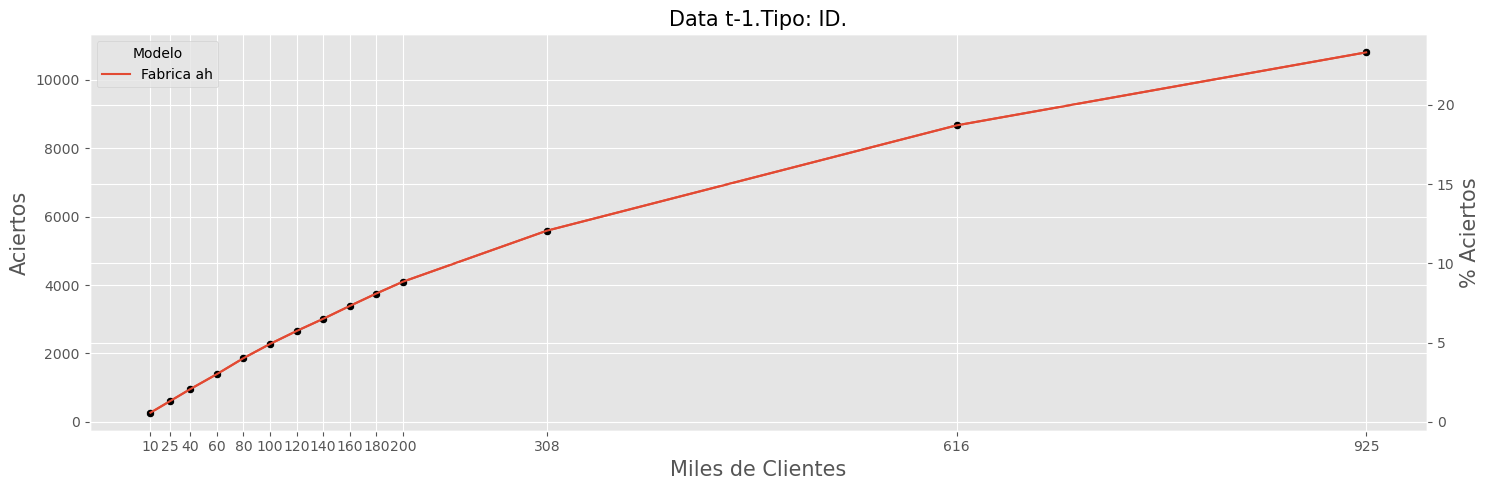

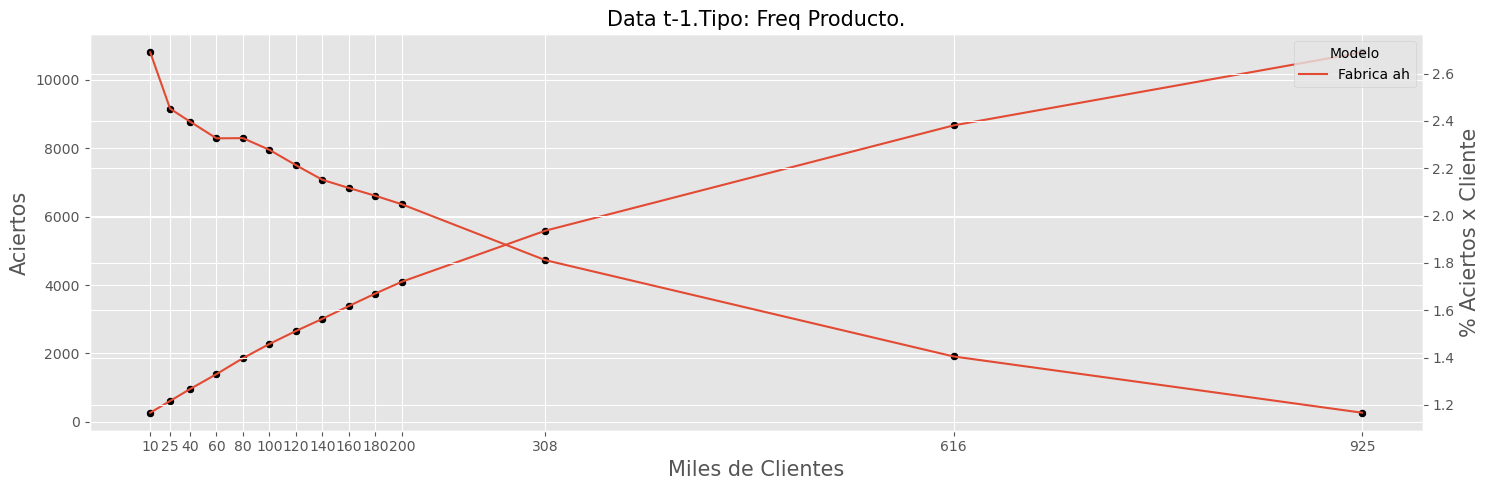

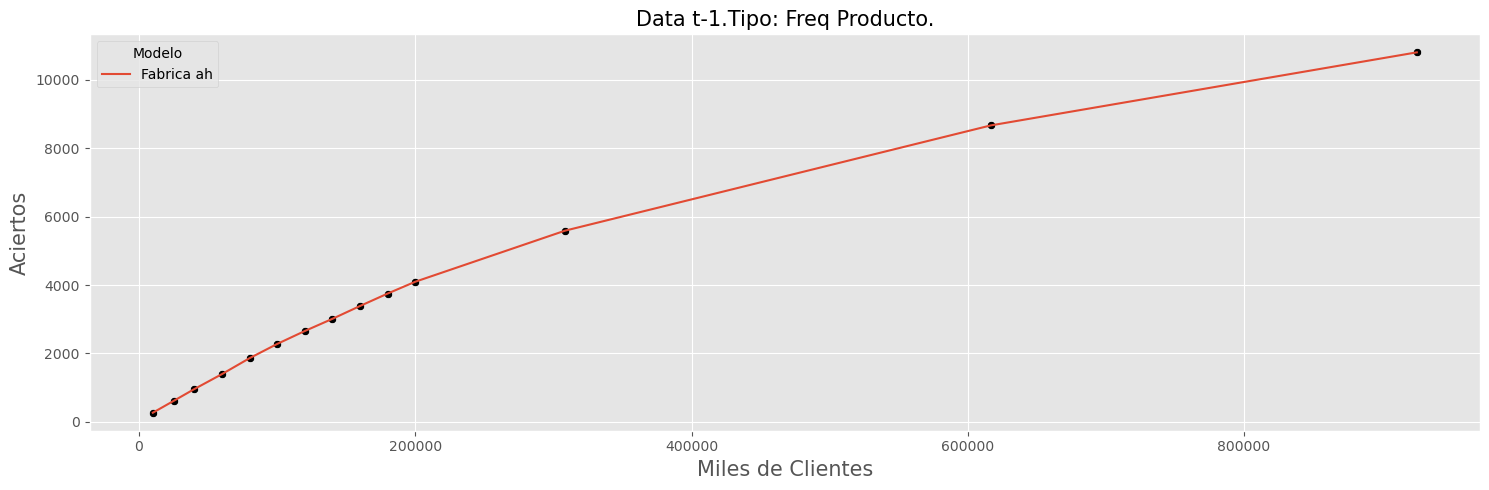

[12/16/24 18:02:09] INFO     ---------------------------------------------------                       ]8;id=333854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=299745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

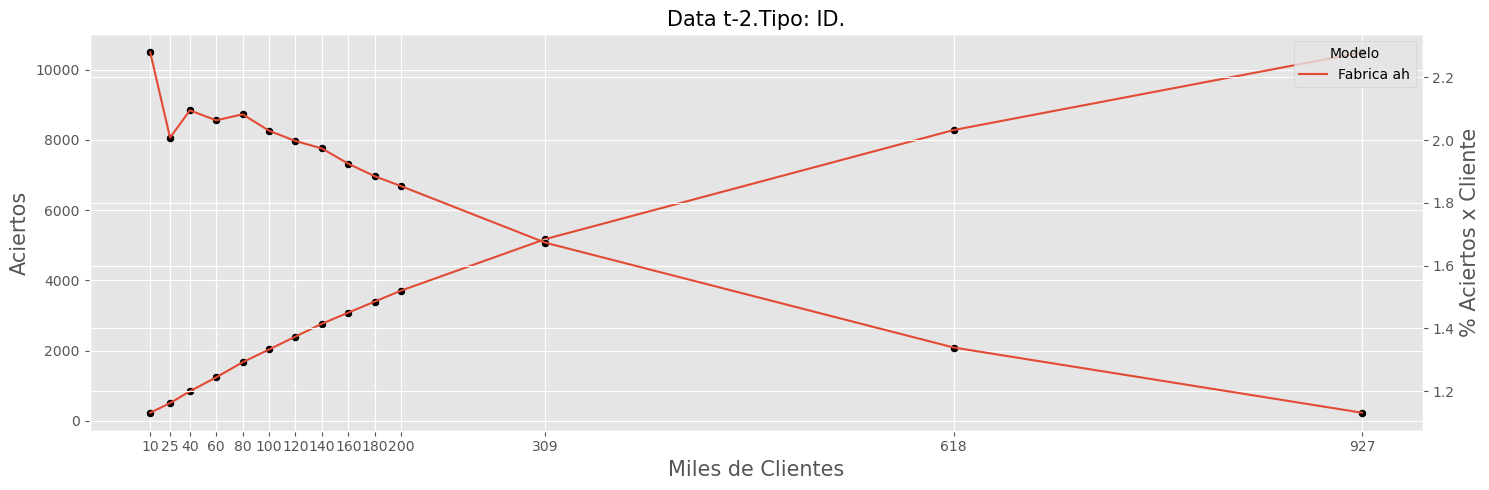

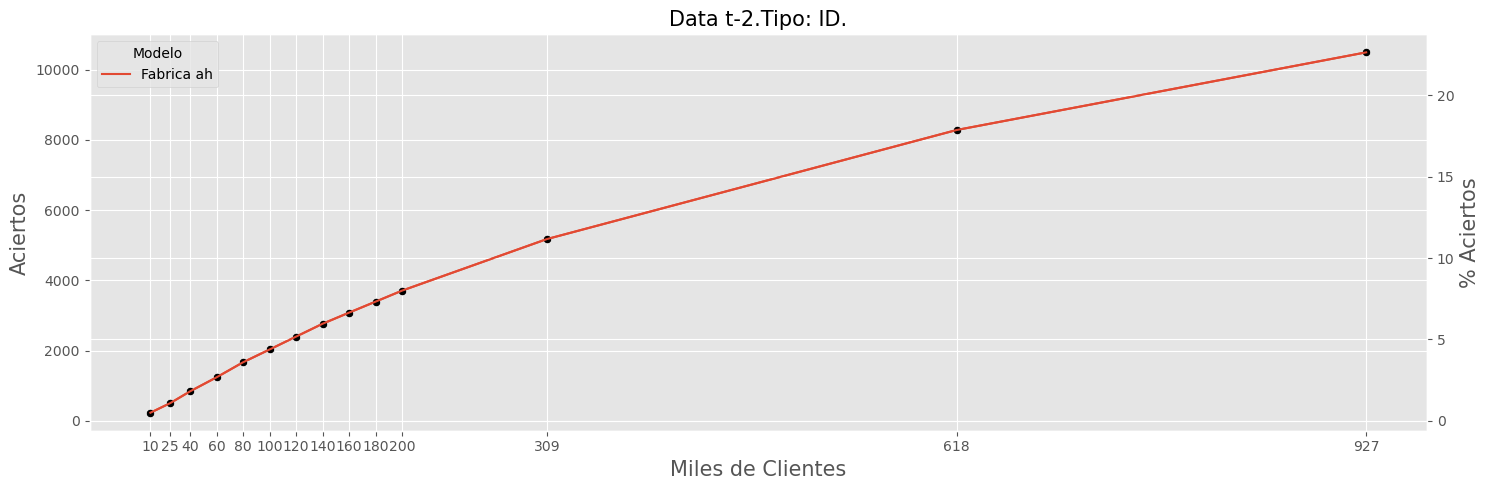

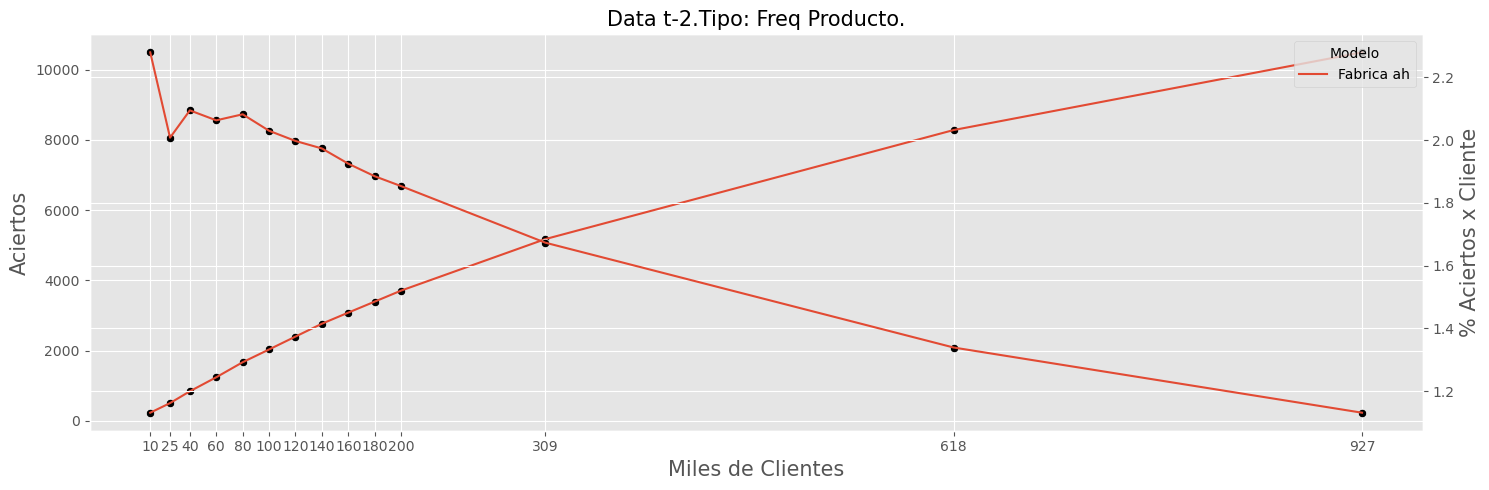

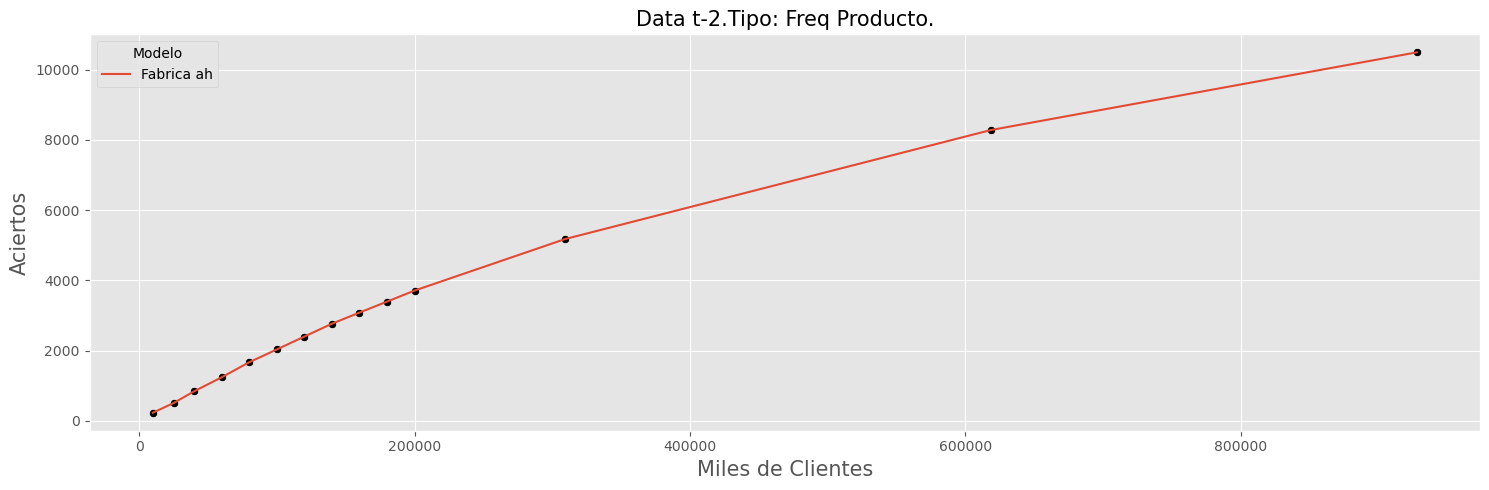

[12/16/24 18:02:11] INFO     ---------------------------------------------------                       ]8;id=991532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=109824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

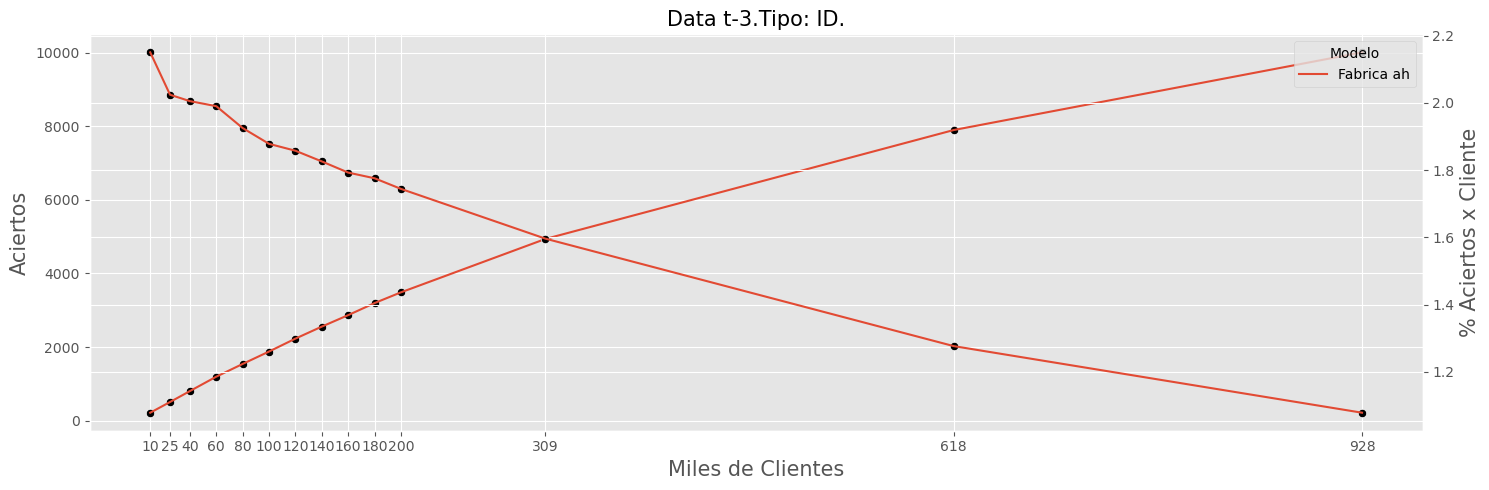

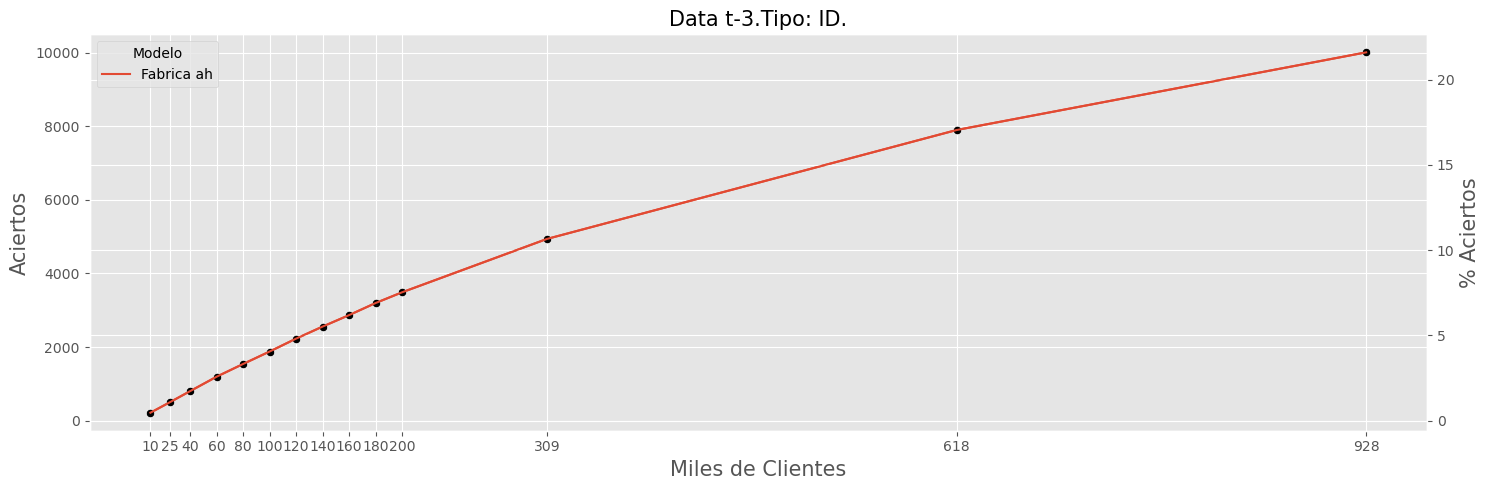

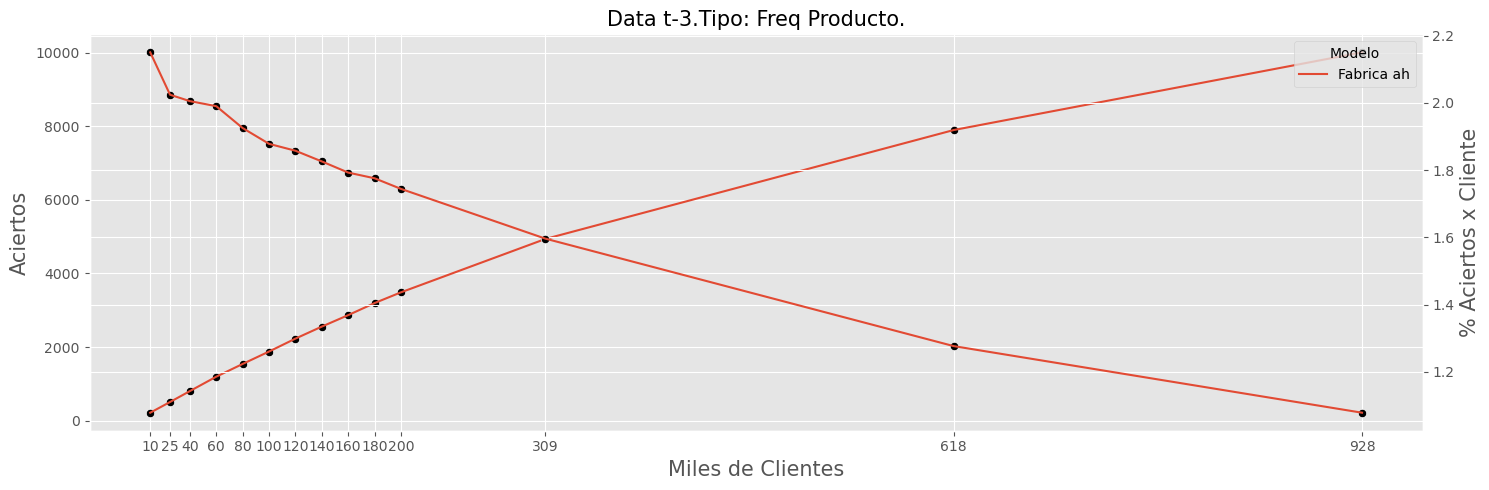

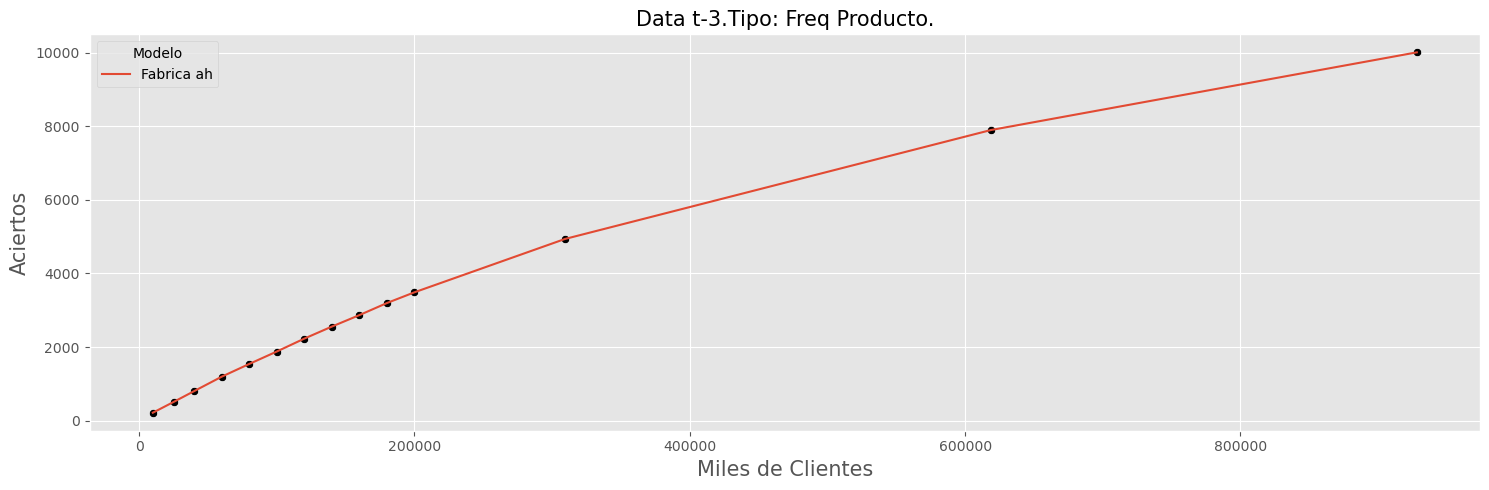

[12/16/24 18:02:12] INFO     ---------------------------------------------------                       ]8;id=451364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=156554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

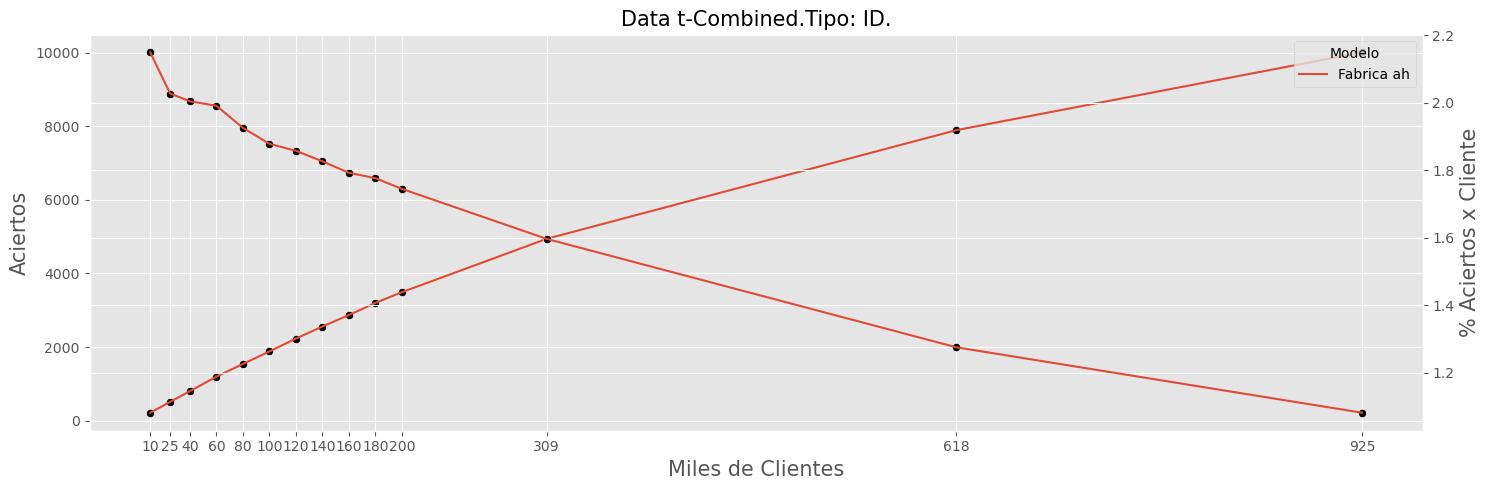

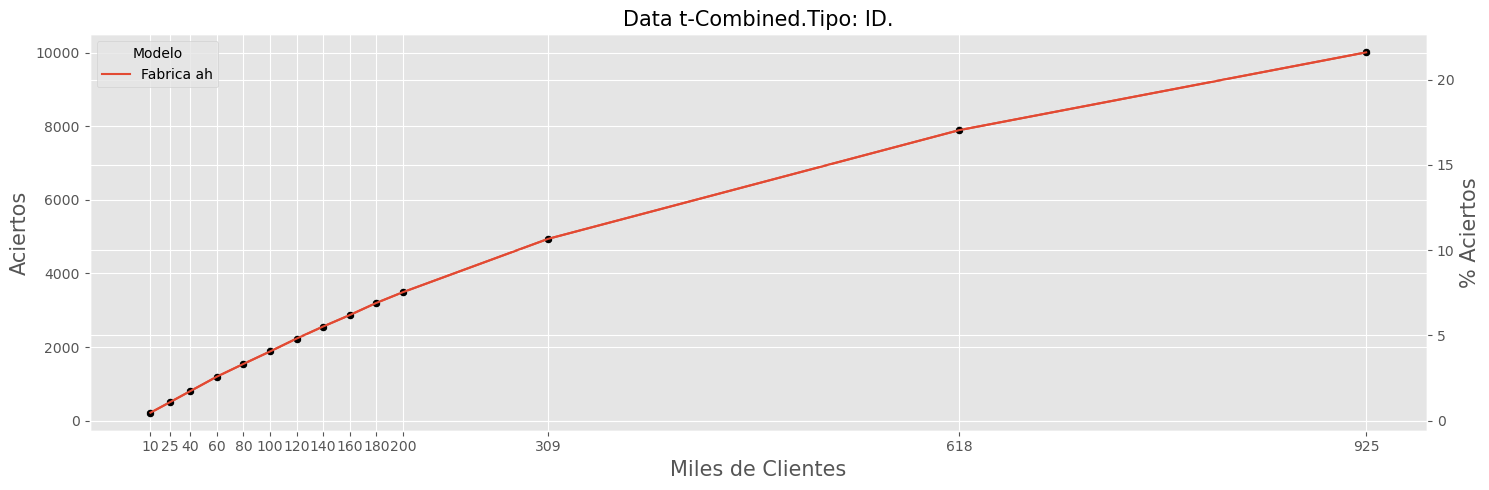

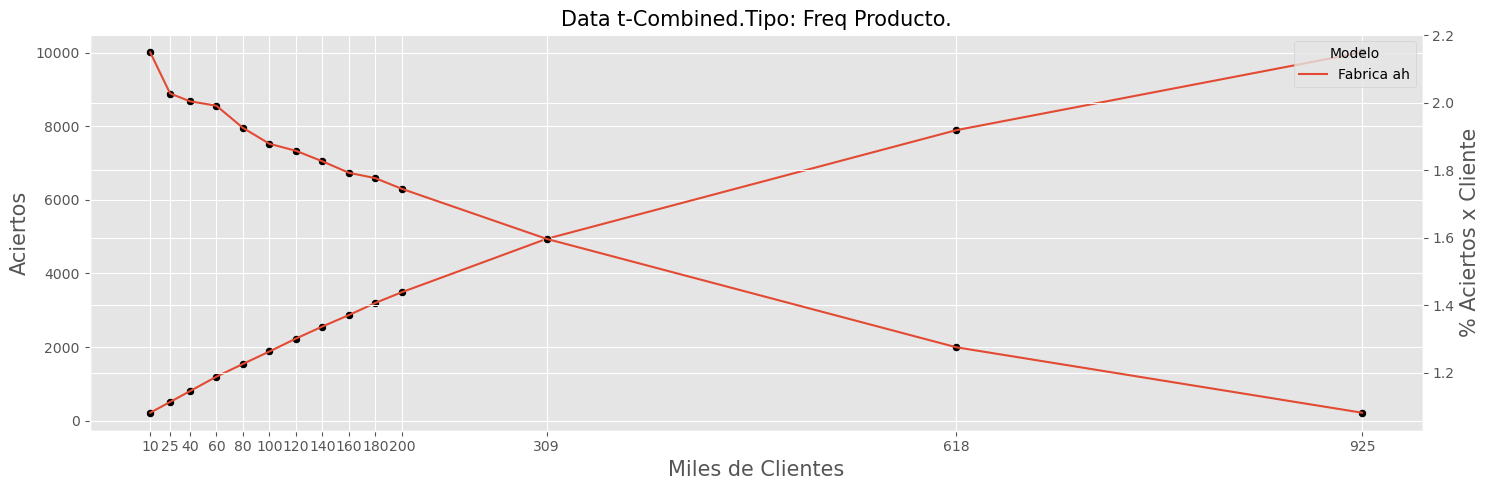

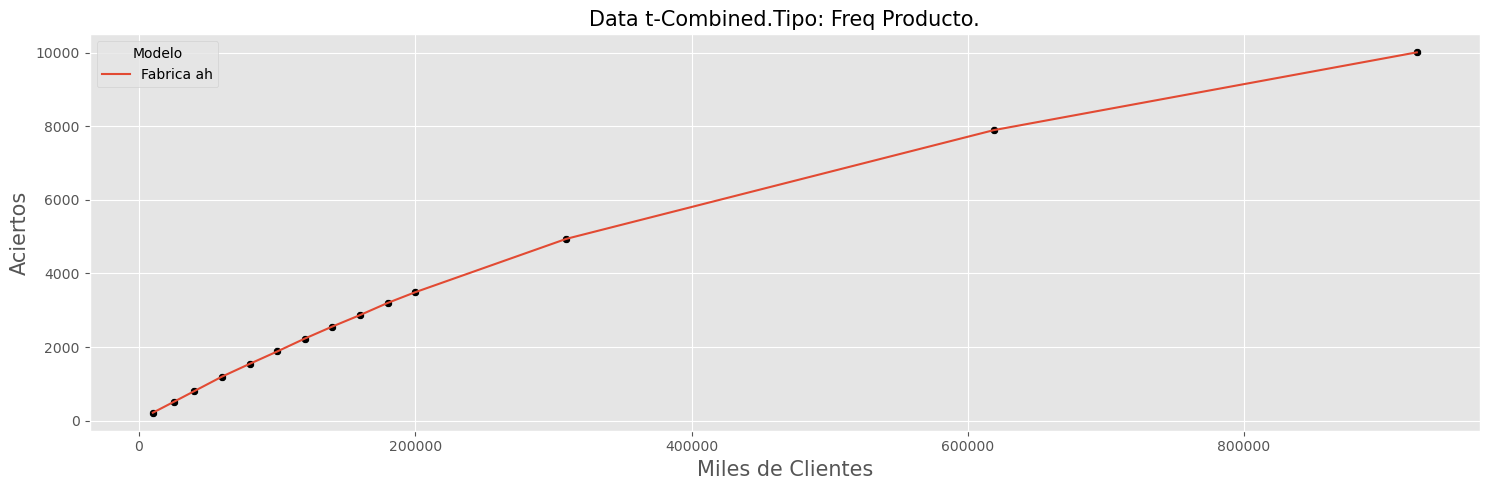

[12/16/24 18:02:13] INFO     ---------------------------------------------------                       ]8;id=653806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=781962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

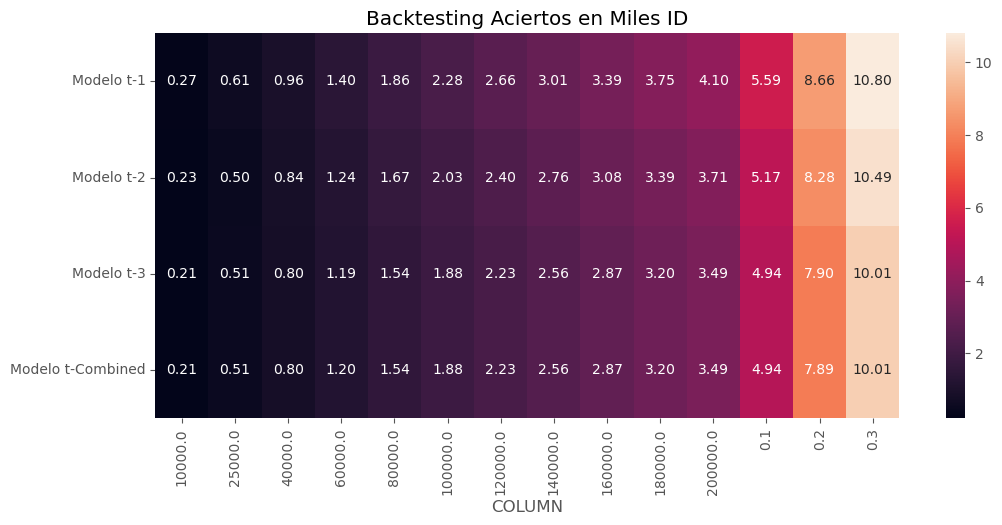

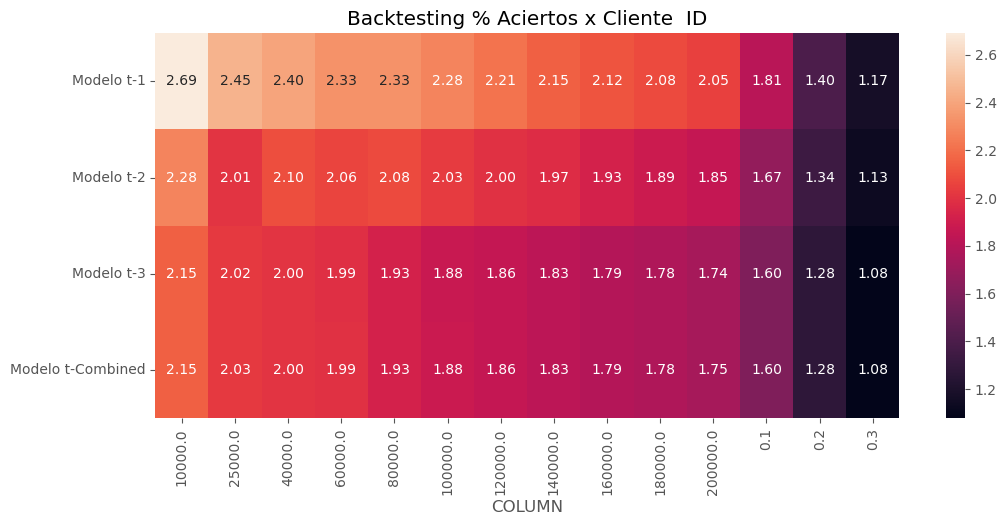

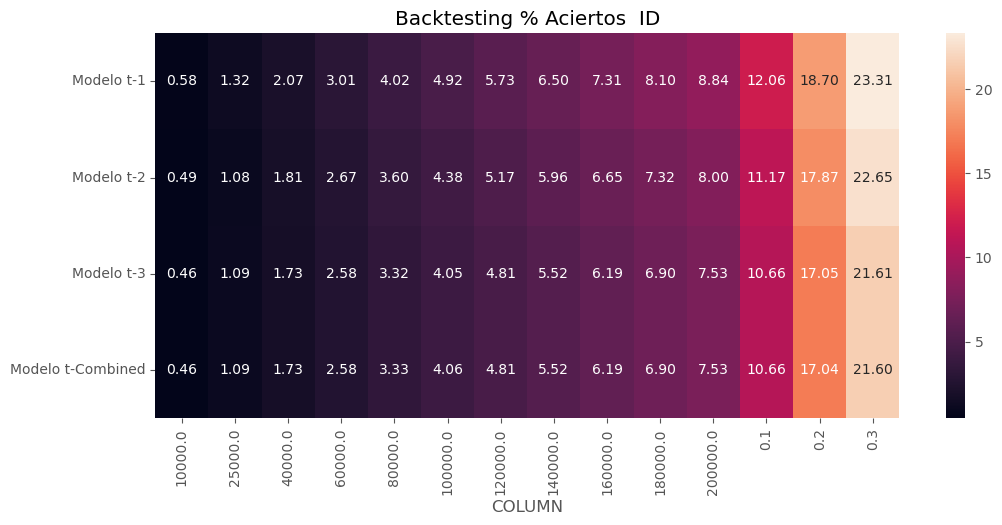

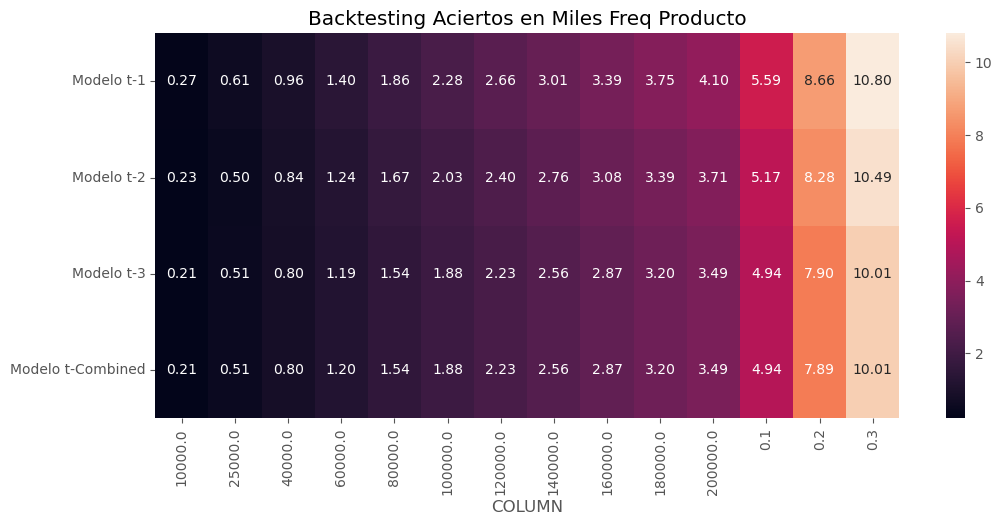

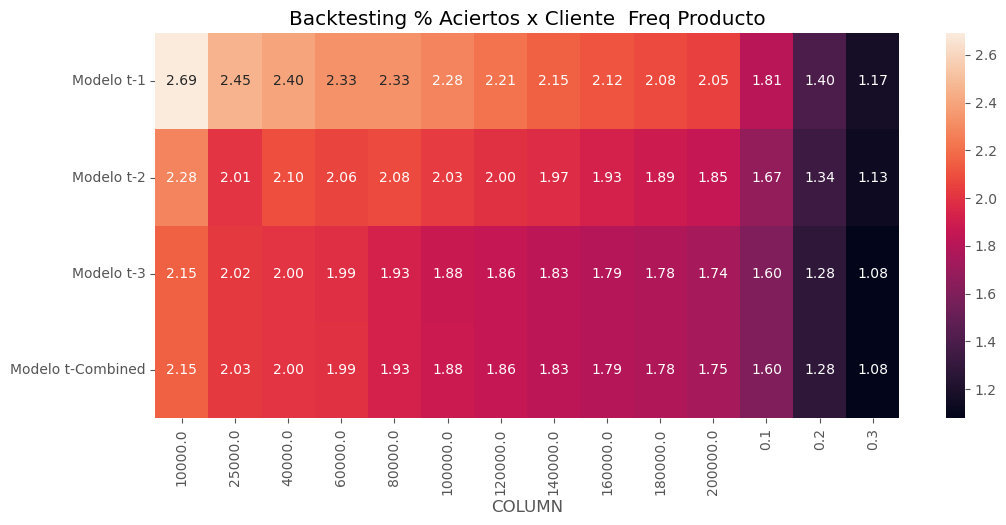

[12/16/24 18:02:15] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=247709;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=754622;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice                          
                             encountered                                                                           
                               vmin = np.nanmin(calc_data)                                                         
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=808379;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=507643;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice                          
                             encountered                                                                           
                               vmax = np.nanmax(calc_data)                                                         
                                                                                                                   

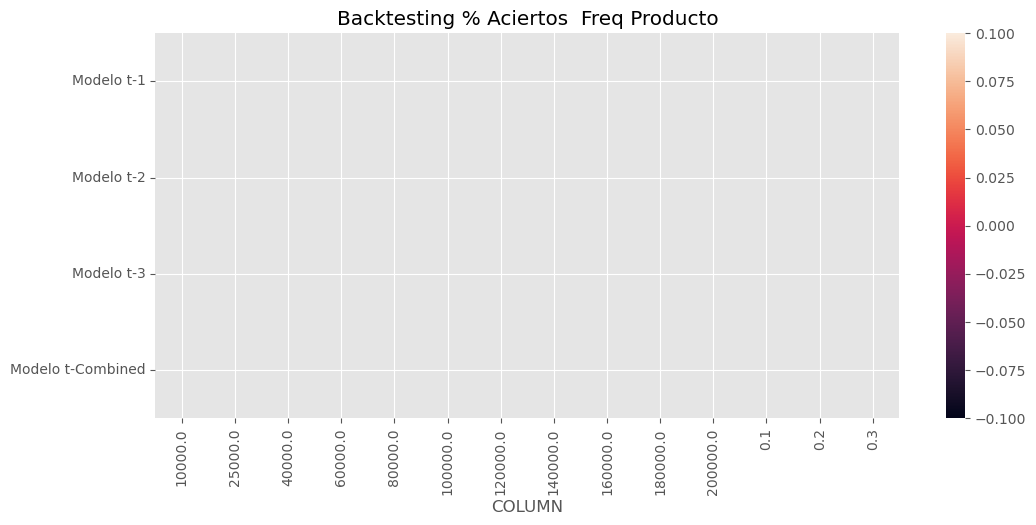

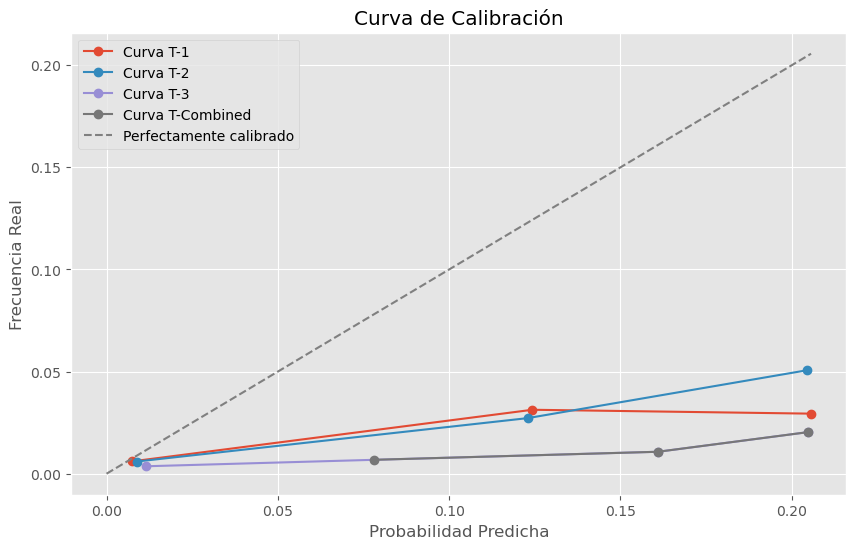

In [25]:
backtesting.plotear_curvas_rezago(save_backtesting, params)
plt.figure(figsize=(10, 6))
max_value = 0
for i in save_backtesting.keys():
    prob_true = save_backtesting[i]['prob_true']
    prob_pred = save_backtesting[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = str(int(i))
    except:
        msg = str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+" T-"+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [26]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['metrics']
    display(res[res["metric_name"].isin(['No medible 1 %','N_top','f1-score','backtest_metric_ntop'])].drop('timestamp', axis=1))
    display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])

1


model_name model_type dataset_name           metric_name     metric_type  \
3          AH  Ensamble,       202409        No medible 1 %  overall metric   
5          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          AH  Ensamble,       202409                 N_top  overall metric   
10         AH  Ensamble,       202409              f1-score  overall metric   
20         AH  Ensamble,       202409              f1-score    class metric   
24         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
3     overall       1.1384  
5     overall       1.2282  
6     overall  925038.0000  
10    overall       2.4618  
20        0.0      82.6780  
24        1.0       2.4618

timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-12 21:54         AH  Ensamble,       202409   True positives   
12  2024-12-12 21:54         AH  Ensamble,       202409  False negatives   
13  2024-12-12 21:54         AH  Ensamble,       202409   True negatives   
14  2024-12-12 21:54         AH  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall    11179.0  
12  overall metric    overall     7079.0  
13  overall metric    overall  2114050.0  
14  overall metric    overall   878758.0

2


model_name model_type dataset_name           metric_name     metric_type  \
3          AH  Ensamble,       202409        No medible 1 %  overall metric   
5          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          AH  Ensamble,       202409                 N_top  overall metric   
10         AH  Ensamble,       202409              f1-score  overall metric   
20         AH  Ensamble,       202409              f1-score    class metric   
24         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
3     overall       1.8337  
5     overall       1.2007  
6     overall  927688.0000  
10    overall       2.4440  
20        0.0      82.6399  
24        1.0       2.4440

timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-12 21:54         AH  Ensamble,       202409   True positives   
12  2024-12-12 21:54         AH  Ensamble,       202409  False negatives   
13  2024-12-12 21:54         AH  Ensamble,       202409   True negatives   
14  2024-12-12 21:54         AH  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall    10861.0  
12  overall metric    overall     6940.0  
13  overall metric    overall  2063755.0  
14  overall metric    overall   860123.0

3


model_name model_type dataset_name           metric_name     metric_type  \
3          AH  Ensamble,       202409        No medible 1 %  overall metric   
5          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          AH  Ensamble,       202409                 N_top  overall metric   
10         AH  Ensamble,       202409              f1-score  overall metric   
20         AH  Ensamble,       202409              f1-score    class metric   
24         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
3     overall       2.1471  
5     overall       1.1588  
6     overall  928061.0000  
10    overall       2.3570  
20        0.0      82.2317  
24        1.0       2.3570

timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-12 21:55         AH  Ensamble,       202409   True positives   
12  2024-12-12 21:55         AH  Ensamble,       202409  False negatives   
13  2024-12-12 21:55         AH  Ensamble,       202409   True negatives   
14  2024-12-12 21:55         AH  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall    10360.0  
12  overall metric    overall     7091.0  
13  overall metric    overall  1986276.0  
14  overall metric    overall   851281.0

Combined


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202409        No medible 1 %  overall metric   
3          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202409                 N_top  overall metric   
8          AH  Ensamble,       202409              f1-score  overall metric   
18         AH  Ensamble,       202409              f1-score    class metric   
22         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
1     overall       7.1624  
3     overall       1.8035  
4     overall  277511.0000  
8     overall       2.3837  
18        0.0       0.0000  
22        1.0       2.3837

timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-12 21:56         AH  Ensamble,       202409   True positives   
10  2024-12-12 21:56         AH  Ensamble,       202409  False negatives   
11  2024-12-12 21:56         AH  Ensamble,       202409   True negatives   
12  2024-12-12 21:56         AH  Ensamble,       202409  False positives   

       metric_type class_name     value  
9   overall metric    overall   10359.0  
10  overall metric    overall       0.0  
11  overall metric    overall       0.0  
12  overall metric    overall  848425.0

In [27]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['ks']
    display(res)

1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      5      2.66     21.33          308346             5766            1.87   
1      4      1.73      2.66          308346             3211            1.04   
2      3      0.65      1.73          308346             2202            0.71   
3      2      0.18      0.65          308346             1602            0.52   
4      1      0.00      0.18         1850076             5477            0.30   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          31.58                10.0    21.58  
1          49.17                20.0    29.17  
2          61.23                30.0    31.23  
3          70.00                40.0    30.00  
4         100.00               100.0     0.00

2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      5      3.13     21.40          309230             5339            1.73   
1      4      2.07      3.13          309229             3236            1.05   
2      3      0.77      2.07          309230             2286            0.74   
3      2      0.18      0.77          309222             1500            0.49   
4      1      0.00      0.18         1855384             5440            0.29   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.99                10.0    19.99  
1          48.17                20.0    28.17  
2          61.01                30.0    31.01  
3          69.44                40.0    29.44  
4         100.00               100.0     0.00

3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      6     19.12     21.67          309354             5093            1.65   
1      5     14.84     19.12          309354             3088            1.00   
2      4      7.14     14.84          309354             2179            0.70   
3      3      3.35      7.14          291508             1330            0.46   
4      2      0.44      3.35          327198             1175            0.36   
5      1      0.00      0.44         1546771             4586            0.30   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.18               10.00    19.18  
1          46.88               20.00    26.88  
2          59.37               30.00    29.37  
3          66.99               39.42    27.56  
4          73.72               50.00    23.72  
5         100.00              100.00     0.00

Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     20.40     21.67           92504             1802            1.95   
1      9     19.79     20.40           92504             1571            1.70   
2      8     19.27     19.79           92504             1330            1.44   
3      7     18.87     19.27           92504             1076            1.16   
4      6     18.56     18.87           92503              887            0.96   
5      5     17.78     18.56           92504              788            0.85   
6      4     14.05     17.78           92504             1077            1.16   
7      3     10.92     14.05           92504              759            0.82   
8      2     10.32     10.92           92504              474            0.51   
9      1      7.20     10.32           92504              595            0.64   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          17.40                10.0     7.40  
1          32.56                20.0    12.56  
2          45.40                30.0    15.40  
3          55.79                40.0    15.79  
4          64.35                50.0    14.35  
5          71.96                60.0    11.96  
6          82.35                70.0    12.35  
7          89.68                80.0     9.68  
8          94.26                90.0     4.26  
9         100.00               100.0     0.00

### Comparacion de modelos

In [8]:
data_backtesting1 = catalog.load("data_backtesting_eda_best_202410")
data_backtesting2 = catalog.load("data_backtesting_eda_ensamble_202410")
data_backtesting3 = catalog.load("data_backtesting_sin_eda_202410")
data_backtesting4 = catalog.load("data_backtesting_sin_eda_202411")

[12/20/24 16:10:14] INFO     Loading data from 'data_backtesting_eda_best_202410'               ]8;id=482470;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=592930;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[12/20/24 16:12:26] INFO     Loading data from 'data_backtesting_eda_ensamble_202410'           ]8;id=740742;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=538889;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[12/20/24 16:14:39] INFO     Loading data from 'data_backtesting_sin_eda_202410'                ]8;id=480819;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=385309;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[12/20/24 16:18:39] INFO     Loading data from 'data_backtesting_sin_eda_202411'                ]8;id=335651;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=451291;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

dict_keys(['ID', 'Freq Producto'])


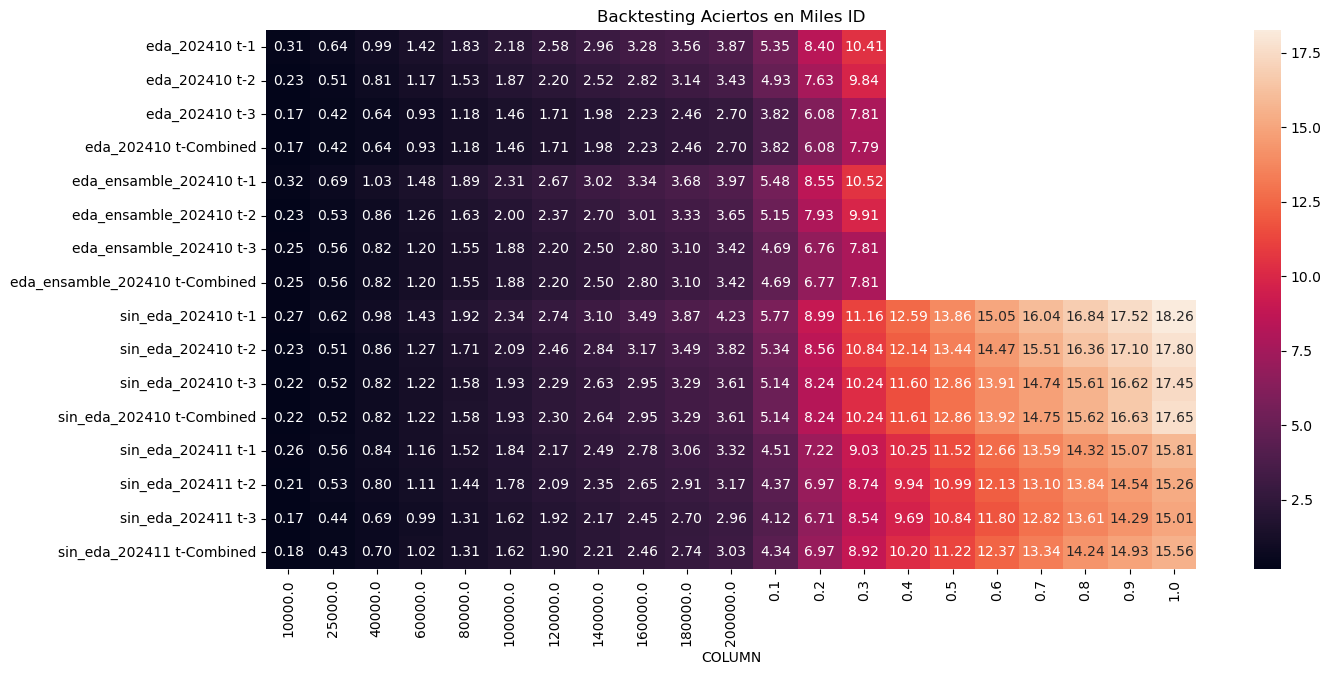

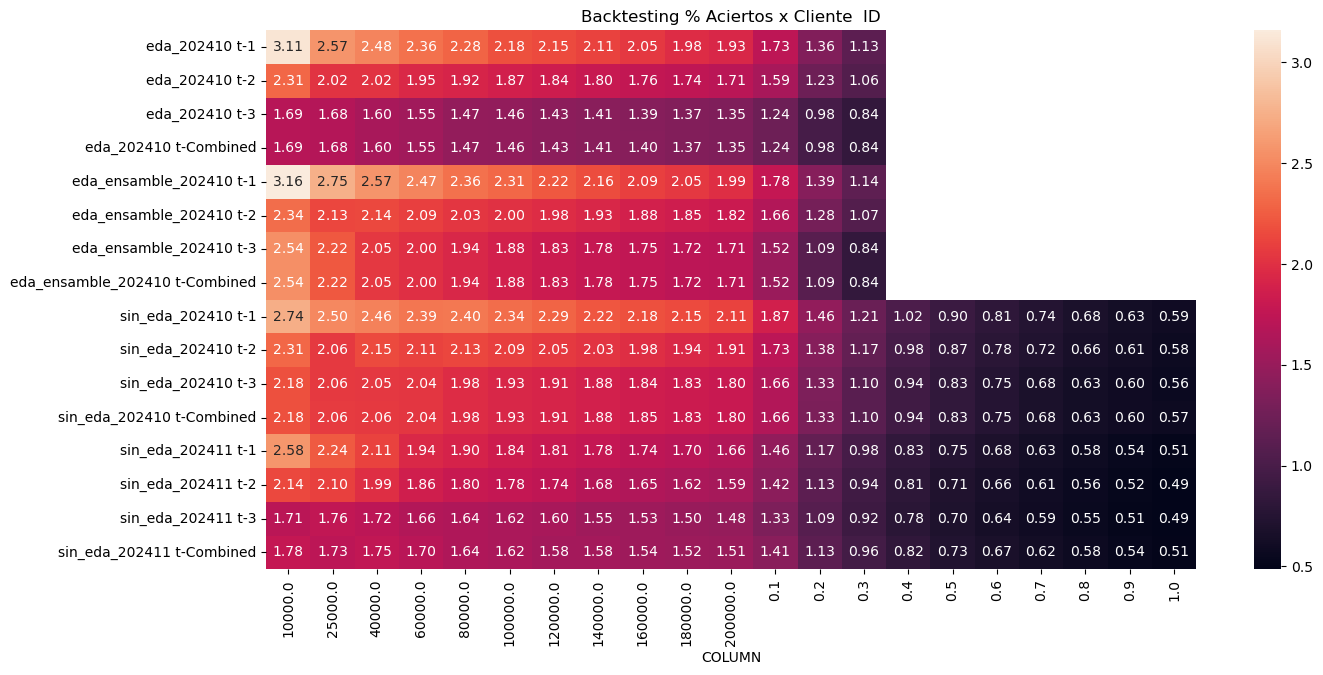

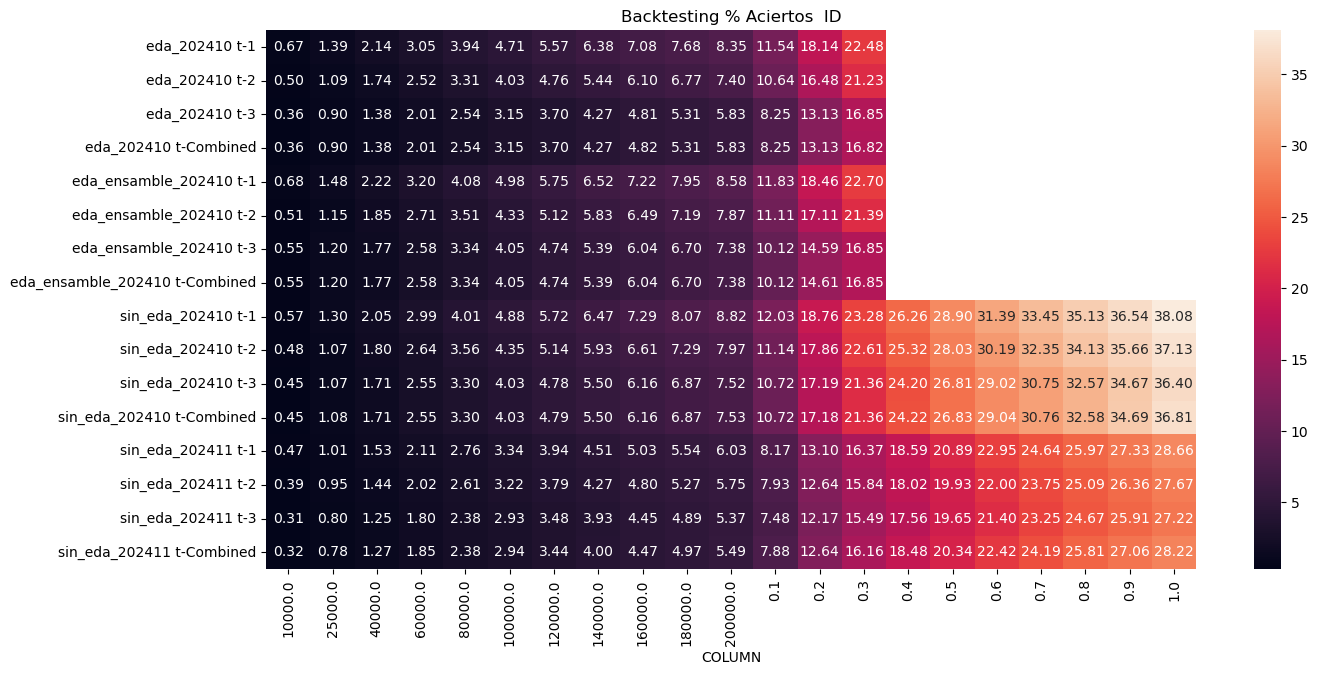

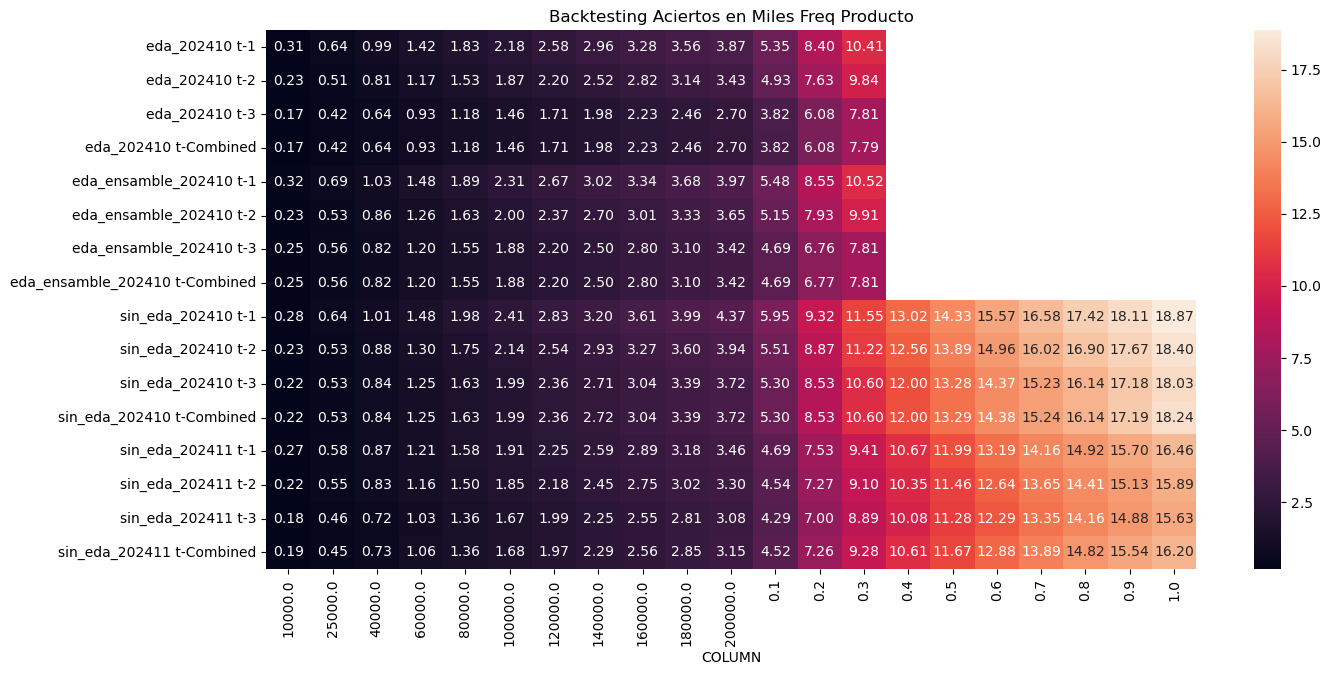

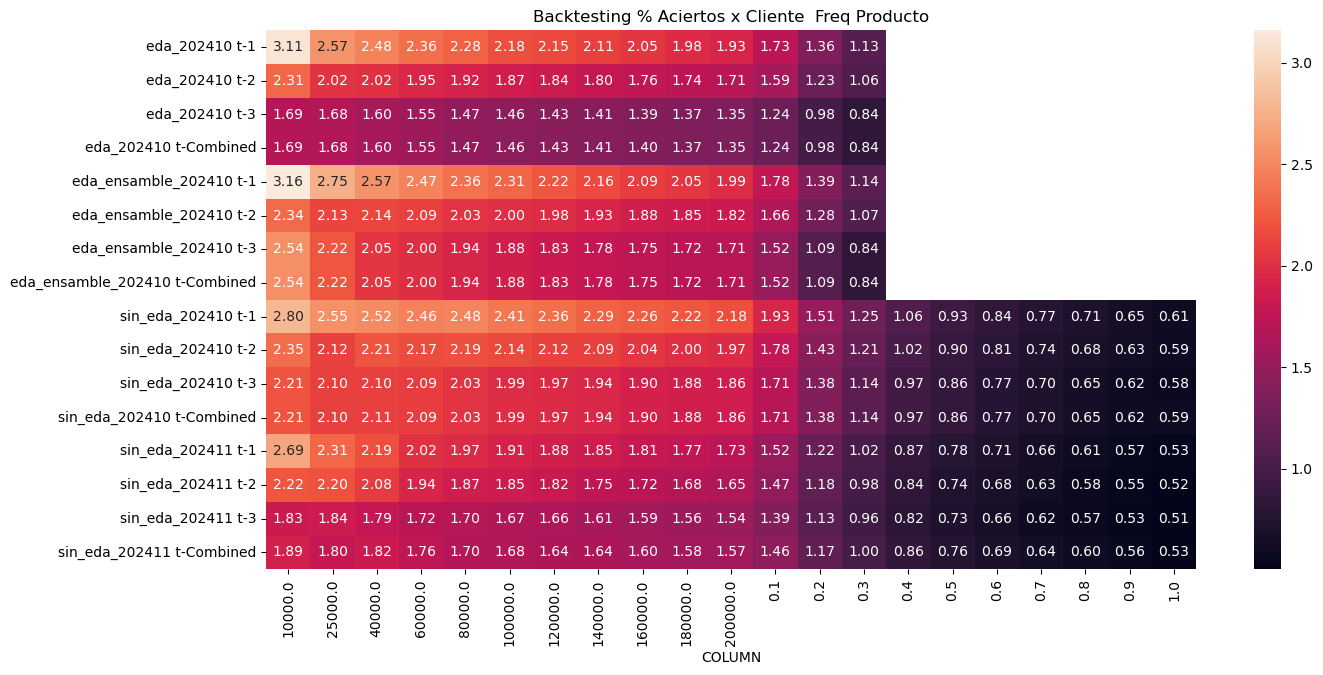

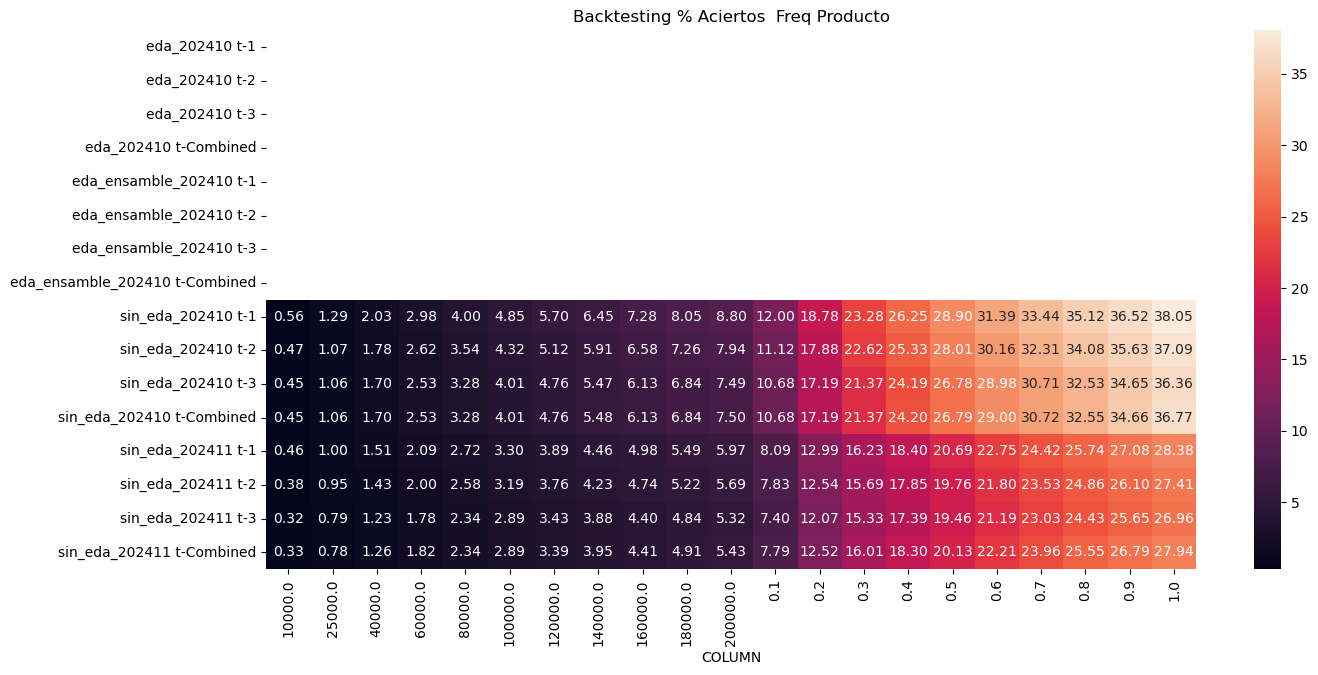

In [15]:
nametag_model = ['eda_202410','eda_ensamble_202410','sin_eda_202410','sin_eda_202411']
backtesting_all = [data_backtesting1,data_backtesting2,data_backtesting3,data_backtesting4]
consolidacion_tipo = {}
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        df_i = save_backtesting[i]['contactabilidad_curva']#.keys()
        df_i = df_i[~df_i['Aciertos'].isnull()]
        df_i = df_i.replace('Fabrica '+params['target'].split('_')[0],name)
        df_i = df_i[df_i['Modelo'] == name]
        for tipo in df_i['Tipo'].unique():
            df_ii = df_i[df_i['Tipo'] == tipo]
            df_ii = df_ii.set_index('COLUMN')
            if tipo not in consolidacion_tipo:
                consolidacion_tipo[tipo] = {'Aciertos': pd.DataFrame(),'% Aciertos x Cliente':pd.DataFrame(),'% Aciertos': pd.DataFrame()}
            for col in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
                consolidacion_tipo[tipo][col] = pd.concat([consolidacion_tipo[tipo][col],df_ii[[col]].rename(columns = {col:name})], axis = 1)
print(consolidacion_tipo.keys())
import seaborn as sns
for col in list(consolidacion_tipo.keys()):
    for tipo in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
        if tipo == 'Aciertos':
            graph = consolidacion_tipo[col][tipo].T/1000
            msj = f'Backtesting {tipo} en Miles {col}'
        else:
            graph = consolidacion_tipo[col][tipo].T
            msj = f'Backtesting {tipo}  {col}'
        plt.figure(figsize=(15,7))
        sns.heatmap(graph, annot = True, fmt= '0.02f')
        plt.title(msj)
        plt.show()

In [11]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['ks']
        display(res)

eda_202410 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      4      2.97     26.08          308346             5520            1.79   
1      3      1.66      2.97          308346             3167            1.03   
2      2      1.10      1.66          308346             2089            0.68   
3      1      0.00      0.00         2158422             7482            0.35   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          30.23                10.0    20.23  
1          47.58                20.0    27.58  
2          59.02                30.0    29.02  
3         100.00               100.0     0.00

eda_202410 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      3      3.20     25.89          309230             5091            1.65   
1      2      2.03      3.20          309228             2812            0.91   
2      1      0.00      2.03         2473837             9898            0.40   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0           28.6                10.0     18.6  
1           44.4                20.0     24.4  
2          100.0               100.0      0.0

eda_202410 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      3     26.50     26.58          309304             3936            1.27   
1      2     26.47     26.50          309300             2360            0.76   
2      1      0.00     26.47         2474935            11155            0.45   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          22.55                10.0    12.56  
1          36.08                20.0    16.08  
2         100.00               100.0     0.00

eda_202410 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     26.53     26.58           92443             1373            1.49   
1      9     26.52     26.53           92527             1220            1.32   
2      8     26.50     26.52           92522             1027            1.11   
3      7     26.49     26.50           92524              837            0.90   
4      6     26.48     26.49           92483              727            0.79   
5      5     26.47     26.48           91095              669            0.73   
6      4     26.46     26.47           93912              608            0.65   
7      3     26.46     26.46           92433              561            0.61   
8      2     26.45     26.46           92586              532            0.57   
9      1     26.44     26.45           92514              517            0.56   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          17.01                9.99     7.02  
1          32.13               20.00    12.13  
2          44.85               30.00    14.85  
3          55.22               40.00    15.22  
4          64.23               50.00    14.23  
5          72.52               59.85    12.67  
6          80.05               70.00    10.05  
7          87.00               79.99     7.01  
8          93.59               90.00     3.60  
9         100.00              100.00     0.00

eda_ensamble_202410 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      4      2.80     22.52          308346             5659            1.84   
1      3      1.67      2.80          308346             3187            1.03   
2      2      0.77      1.67          294447             1966            0.67   
3      1      0.00      0.77         2172321             7446            0.34   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          30.99               10.00    20.99  
1          48.45               20.00    28.45  
2          59.22               29.55    29.67  
3         100.00              100.00     0.00

eda_ensamble_202410 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      4      3.07     23.00          309230             5315            1.72   
1      3      1.98      3.07          309229             2891            0.93   
2      2      0.95      1.98          309230             2049            0.66   
3      1      0.00      0.95         2164606             7546            0.35   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.86                10.0    19.86  
1          46.10                20.0    26.10  
2          57.61                30.0    27.61  
3         100.00               100.0     0.00

eda_ensamble_202410 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0      5     25.96     26.11          309354             4849            1.57   
1      4     17.66     25.96          309297             2148            0.69   
2      3      8.40     17.66          309411             1087            0.35   
3      2      8.31      8.39          309354             3325            1.07   
4      1      0.00      8.31         1856123             6042            0.33   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          27.79                10.0    17.79  
1          40.10                20.0    20.10  
2          46.32                30.0    16.32  
3          65.38                40.0    25.38  
4         100.00               100.0     0.00

eda_ensamble_202410 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     26.03     26.11           92504             1822            1.97   
1      9     26.00     26.03           92504             1476            1.60   
2      8     25.97     26.00           92504             1258            1.36   
3      7     25.94     25.97           92504              770            0.83   
4      6     17.68     25.94           92479              833            0.90   
5      5     17.66     17.68           92494              563            0.61   
6      4     17.65     17.66           92476              395            0.43   
7      3     17.64     17.65           92512              340            0.37   
8      2     17.64     17.64           92458              329            0.36   
9      1     17.63     17.64           92604              299            0.32   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          22.54               10.00    12.54  
1          40.79               20.00    20.79  
2          56.35               30.00    26.35  
3          65.88               40.00    25.88  
4          76.18               50.00    26.18  
5          83.14               60.00    23.15  
6          88.03               69.99    18.03  
7          92.23               79.99    12.24  
8          96.30               89.99     6.31  
9         100.00              100.00     0.00

sin_eda_202410 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.66     21.33          308346             5769            1.87   
1      9      1.76      2.66          308346             3226            1.05   
2      8      1.12      1.76          308346             2166            0.70   
3      7      0.90      1.12          293681             1346            0.46   
4      6      0.74      0.90          311895             1297            0.42   
5      5      0.62      0.74          319462             1246            0.39   
6      4      0.54      0.62          308346              988            0.32   
7      3      0.50      0.54          293712              799            0.27   
8      2      0.47      0.50          322980              681            0.21   
9      1      0.07      0.47          308346              740            0.24   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          31.60               10.00    21.60  
1          49.27               20.00    29.27  
2          61.13               30.00    31.13  
3          68.50               39.52    28.98  
4          75.61               49.64    25.97  
5          82.43               60.00    22.43  
6          87.84               70.00    17.84  
7          92.22               79.53    12.69  
8          95.95               90.00     5.95  
9         100.00              100.00     0.00

sin_eda_202410 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      3.13     21.40          309230             5342            1.73   
1      9      2.10      3.13          309229             3222            1.04   
2      8      1.36      2.10          309230             2278            0.74   
3      7      1.13      1.36          295082             1247            0.42   
4      6      0.89      1.13          323376             1349            0.42   
5      5      0.76      0.89          309191             1035            0.33   
6      4      0.64      0.76          309268             1036            0.33   
7      3      0.56      0.64          309230              855            0.28   
8      2      0.52      0.56          309229              732            0.24   
9      1      0.09      0.52          309230              705            0.23   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          30.01               10.00    20.01  
1          48.11               20.00    28.11  
2          60.91               30.00    30.91  
3          67.91               39.54    28.37  
4          75.49               50.00    25.49  
5          81.30               60.00    21.31  
6          87.12               70.00    17.12  
7          91.93               80.00    11.93  
8          96.04               90.00     6.04  
9         100.00              100.00     0.00

sin_eda_202410 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     19.14     21.67          309354             5139            1.66   
1      9     17.75     19.14          309354             3101            1.00   
2      8     15.82     17.75          240085             1822            0.76   
3      7     14.61     15.82          367925             1530            0.42   
4      6     13.20     14.61          320051             1264            0.39   
5      5     12.12     13.20          309354             1059            0.34   
6      4     11.30     12.12          309354              829            0.27   
7      3     10.43     11.30          309354              870            0.28   
8      2      8.67     10.43          309338             1009            0.33   
9      1      0.20      8.67          309370              828            0.27   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.45               10.00    19.45  
1          47.22               20.00    27.22  
2          57.66               27.76    29.90  
3          66.43               39.65    26.77  
4          73.67               50.00    23.67  
5          79.74               60.00    19.74  
6          84.49               70.00    14.49  
7          89.47               80.00     9.47  
8          95.26               90.00     5.26  
9         100.00              100.00     0.00

sin_eda_202410 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     19.15     21.67          308346             5125            1.66   
1      9     17.77     19.15          308346             3087            1.00   
2      8     15.82     17.77          242456             1854            0.76   
3      7     14.61     15.82          367987             1533            0.42   
4      6     13.23     14.61          314595             1248            0.40   
5      5     12.14     13.23          308346             1059            0.34   
6      4     11.32     12.14          308346              830            0.27   
7      3     10.49     11.32          308346              849            0.28   
8      2      8.71     10.49          308333             1020            0.33   
9      1      2.62      8.71          308360             1044            0.34   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.04               10.00    19.04  
1          46.53               20.00    26.53  
2          57.03               27.86    29.17  
3          65.72               39.80    25.92  
4          72.79               50.00    22.79  
5          78.79               60.00    18.79  
6          83.49               70.00    13.49  
7          88.31               80.00     8.31  
8          94.08               90.00     4.09  
9         100.00              100.00     0.00

sin_eda_202411 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.51     20.91          308088             4509            1.46   
1      9      1.72      2.51          308088             2715            0.88   
2      8      1.08      1.72          307863             1807            0.59   
3      7      0.86      1.08          299664             1174            0.39   
4      6      0.77      0.86          316736             1315            0.42   
5      5      0.63      0.77          308039             1141            0.37   
6      4      0.55      0.63          308137              932            0.30   
7      3      0.49      0.55          308088              730            0.24   
8      2      0.46      0.49          308088              752            0.24   
9      1      0.11      0.46          308088              733            0.24   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          28.52               10.00    18.52  
1          45.70               20.00    25.70  
2          57.13               29.99    27.14  
3          64.56               39.72    24.84  
4          72.87               50.00    22.87  
5          80.09               60.00    20.09  
6          85.99               70.00    15.99  
7          90.61               80.00    10.61  
8          95.36               90.00     5.36  
9         100.00              100.00     0.00

sin_eda_202411 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.66     21.33          308346             4372            1.42   
1      9      1.76      2.66          308346             2600            0.84   
2      8      1.12      1.76          308346             1765            0.57   
3      7      0.90      1.12          293681             1151            0.39   
4      6      0.74      0.90          311895             1065            0.34   
5      5      0.62      0.74          319462             1179            0.37   
6      4      0.54      0.62          308346              967            0.31   
7      3      0.50      0.54          293712              736            0.25   
8      2      0.47      0.50          322980              704            0.22   
9      1      0.07      0.47          308346              725            0.24   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          28.64               10.00    18.64  
1          45.68               20.00    25.68  
2          57.24               30.00    27.24  
3          64.78               39.52    25.26  
4          71.76               49.64    22.12  
5          79.48               60.00    19.48  
6          85.82               70.00    15.82  
7          90.64               79.53    11.11  
8          95.25               90.00     5.25  
9         100.00              100.00     0.00

sin_eda_202411 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      3.13     21.40          309230             4124            1.33   
1      9      2.10      3.13          309229             2590            0.84   
2      8      1.36      2.10          309230             1829            0.59   
3      7      1.13      1.36          295082             1122            0.38   
4      6      0.89      1.13          323376             1176            0.36   
5      5      0.76      0.89          309191              961            0.31   
6      4      0.64      0.76          309268             1022            0.33   
7      3      0.56      0.64          309230              783            0.25   
8      2      0.52      0.56          309229              684            0.22   
9      1      0.09      0.52          309230              723            0.23   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          27.47               10.00    17.47  
1          44.72               20.00    24.72  
2          56.90               30.00    26.90  
3          64.37               39.54    24.83  
4          72.21               50.00    22.21  
5          78.61               60.00    18.61  
6          85.41               70.00    15.41  
7          90.63               80.00    10.63  
8          95.18               90.00     5.18  
9         100.00              100.00     0.00

sin_eda_202411 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      3.46     21.40          308088             4335            1.41   
1      9      2.32      3.46          308088             2625            0.85   
2      8      1.59      2.32          308088             1933            0.63   
3      7      1.19      1.59          308088             1282            0.42   
4      6      1.00      1.19          303422              971            0.32   
5      5      0.85      1.00          312754             1207            0.39   
6      4      0.76      0.85          308088              969            0.31   
7      3      0.61      0.76          308088              885            0.29   
8      2      0.55      0.61          308088              694            0.23   
9      1      0.50      0.55          308088              664            0.22   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          27.85               10.00    17.85  
1          44.72               20.00    24.72  
2          57.13               30.00    27.13  
3          65.37               40.00    25.37  
4          71.61               49.85    21.76  
5          79.36               60.00    19.36  
6          85.59               70.00    15.59  
7          91.28               80.00    11.28  
8          95.73               90.00     5.73  
9         100.00              100.00     0.00

In [16]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['metrics']
        display(res[res["metric_name"].isin(['No medible 1 %','N_top','f1-score','recall','backtest_metric_ntop'])].drop('timestamp', axis=1))

eda_202410 t-1


model_name      model_type dataset_name           metric_name  \
3          AH  xgboost_1,Run2       202409        No medible 1 %   
5          AH  xgboost_1,Run2       202409  backtest_metric_ntop   
6          AH  xgboost_1,Run2       202409                 N_top   
9          AH  xgboost_1,Run2       202409                recall   
10         AH  xgboost_1,Run2       202409              f1-score   
19         AH  xgboost_1,Run2       202409                recall   
20         AH  xgboost_1,Run2       202409              f1-score   
23         AH  xgboost_1,Run2       202409                recall   
24         AH  xgboost_1,Run2       202409              f1-score   

       metric_type class_name        value  
3   overall metric    overall       0.9325  
5   overall metric    overall       1.1767  
6   overall metric    overall  925038.0000  
9   overall metric    overall      59.0207  
10  overall metric    overall       2.3566  
19    class metric        0.0      70.4121  
20    class metric        0.0      82.5164  
23    class metric        1.0      59.0207  
24    class metric        1.0       2.3566

eda_202410 t-2


model_name      model_type dataset_name           metric_name  \
3          AH  xgboost_1,Run2       202409        No medible 1 %   
5          AH  xgboost_1,Run2       202409  backtest_metric_ntop   
6          AH  xgboost_1,Run2       202409                 N_top   
9          AH  xgboost_1,Run2       202409                recall   
10         AH  xgboost_1,Run2       202409              f1-score   
19         AH  xgboost_1,Run2       202409                recall   
20         AH  xgboost_1,Run2       202409              f1-score   
23         AH  xgboost_1,Run2       202409                recall   
24         AH  xgboost_1,Run2       202409              f1-score   

       metric_type class_name        value  
3   overall metric    overall       1.4913  
5   overall metric    overall       1.1141  
6   overall metric    overall  927688.0000  
9   overall metric    overall      57.1597  
10  overall metric    overall       2.2627  
19    class metric        0.0      70.1971  
20    class metric        0.0      82.3630  
23    class metric        1.0      57.1597  
24    class metric        1.0       2.2627

eda_202410 t-3


model_name      model_type dataset_name           metric_name  \
3          AH  xgboost_1,Run2       202409        No medible 1 %   
5          AH  xgboost_1,Run2       202409  backtest_metric_ntop   
6          AH  xgboost_1,Run2       202409                 N_top   
9          AH  xgboost_1,Run2       202409                recall   
10         AH  xgboost_1,Run2       202409              f1-score   
19         AH  xgboost_1,Run2       202409                recall   
20         AH  xgboost_1,Run2       202409              f1-score   
23         AH  xgboost_1,Run2       202409                recall   
24         AH  xgboost_1,Run2       202409              f1-score   

       metric_type class_name        value  
3   overall metric    overall       1.0169  
5   overall metric    overall       0.8886  
6   overall metric    overall  928061.0000  
9   overall metric    overall      46.3240  
10  overall metric    overall       1.7688  
19    class metric        0.0      68.6872  
20    class metric        0.0      81.2783  
23    class metric        1.0      46.3240  
24    class metric        1.0       1.7688

eda_202410 t-Combined


model_name      model_type dataset_name           metric_name  \
1          AH  xgboost_1,Run2       202409        No medible 1 %   
3          AH  xgboost_1,Run2       202409  backtest_metric_ntop   
4          AH  xgboost_1,Run2       202409                 N_top   
7          AH  xgboost_1,Run2       202409                recall   
8          AH  xgboost_1,Run2       202409              f1-score   
17         AH  xgboost_1,Run2       202409                recall   
18         AH  xgboost_1,Run2       202409              f1-score   
21         AH  xgboost_1,Run2       202409                recall   
22         AH  xgboost_1,Run2       202409              f1-score   

       metric_type class_name        value  
1   overall metric    overall       3.3897  
3   overall metric    overall       1.3279  
4   overall metric    overall  277511.0000  
7   overall metric    overall     100.0000  
8   overall metric    overall       1.7901  
17    class metric        0.0       0.0000  
18    class metric        0.0       0.0000  
21    class metric        1.0     100.0000  
22    class metric        1.0       1.7901

eda_ensamble_202410 t-1


model_name model_type dataset_name           metric_name     metric_type  \
3          AH  Ensamble,       202409        No medible 1 %  overall metric   
5          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          AH  Ensamble,       202409                 N_top  overall metric   
9          AH  Ensamble,       202409                recall  overall metric   
10         AH  Ensamble,       202409              f1-score  overall metric   
19         AH  Ensamble,       202409                recall    class metric   
20         AH  Ensamble,       202409              f1-score    class metric   
23         AH  Ensamble,       202409                recall    class metric   
24         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
3     overall       0.9410  
5     overall       1.2012  
6     overall  925038.0000  
9     overall      59.5575  
10    overall       2.3787  
19        0.0      70.4241  
20        0.0      82.5262  
23        1.0      59.5575  
24        1.0       2.3787

eda_ensamble_202410 t-2


model_name model_type dataset_name           metric_name     metric_type  \
3          AH  Ensamble,       202409        No medible 1 %  overall metric   
5          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          AH  Ensamble,       202409                 N_top  overall metric   
9          AH  Ensamble,       202409                recall  overall metric   
10         AH  Ensamble,       202409              f1-score  overall metric   
19         AH  Ensamble,       202409                recall    class metric   
20         AH  Ensamble,       202409              f1-score    class metric   
23         AH  Ensamble,       202409                recall    class metric   
24         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
3     overall       1.4838  
5     overall       1.1473  
6     overall  927688.0000  
9     overall      57.6091  
10    overall       2.2799  
19        0.0      70.1921  
20        0.0      82.3608  
23        1.0      57.6091  
24        1.0       2.2799

eda_ensamble_202410 t-3


model_name model_type dataset_name           metric_name     metric_type  \
3          AH  Ensamble,       202409        No medible 1 %  overall metric   
5          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          AH  Ensamble,       202409                 N_top  overall metric   
9          AH  Ensamble,       202409                recall  overall metric   
10         AH  Ensamble,       202409              f1-score  overall metric   
19         AH  Ensamble,       202409                recall    class metric   
20         AH  Ensamble,       202409              f1-score    class metric   
23         AH  Ensamble,       202409                recall    class metric   
24         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
3     overall       1.0169  
5     overall       0.9368  
6     overall  928061.0000  
9     overall      46.3240  
10    overall       1.7688  
19        0.0      68.6872  
20        0.0      81.2783  
23        1.0      46.3240  
24        1.0       1.7688

eda_ensamble_202410 t-Combined


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202409        No medible 1 %  overall metric   
3          AH  Ensamble,       202409  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202409                 N_top  overall metric   
7          AH  Ensamble,       202409                recall  overall metric   
8          AH  Ensamble,       202409              f1-score  overall metric   
17         AH  Ensamble,       202409                recall    class metric   
18         AH  Ensamble,       202409              f1-score    class metric   
21         AH  Ensamble,       202409                recall    class metric   
22         AH  Ensamble,       202409              f1-score    class metric   

   class_name        value  
1     overall       3.3936  
3     overall       1.6843  
4     overall  277511.0000  
7     overall     100.0000  
8     overall       1.7932  
17        0.0       0.0000  
18        0.0       0.0000  
21        1.0     100.0000  
22        1.0       1.7932

sin_eda_202410 t-1


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  2.347800e+00  
3     overall  6.064000e-01  
4     overall  3.083460e+06  
7     overall  1.000000e+02  
8     overall  1.205400e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.205400e+00

sin_eda_202410 t-2


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  4.870700e+00  
3     overall  6.051000e-01  
4     overall  3.092295e+06  
7     overall  1.000000e+02  
8     overall  1.203000e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.203000e+00

sin_eda_202410 t-3


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  7.710600e+00  
3     overall  6.112000e-01  
4     overall  3.093539e+06  
7     overall  1.000000e+02  
8     overall  1.215100e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.215100e+00

sin_eda_202410 t-Combined


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  7.708600e+00  
3     overall  6.202000e-01  
4     overall  3.083461e+06  
7     overall  1.000000e+02  
8     overall  1.232700e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.232700e+00

sin_eda_202411 t-1


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  2.546700e+00  
3     overall  5.265000e-01  
4     overall  3.080879e+06  
7     overall  1.000000e+02  
8     overall  1.047500e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.047500e+00

sin_eda_202411 t-2


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  4.793200e+00  
3     overall  5.200000e-01  
4     overall  3.083460e+06  
7     overall  1.000000e+02  
8     overall  1.034500e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.034500e+00

sin_eda_202411 t-3


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  7.217100e+00  
3     overall  5.233000e-01  
4     overall  3.092295e+06  
7     overall  1.000000e+02  
8     overall  1.041100e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.041100e+00

sin_eda_202411 t-Combined


model_name model_type dataset_name           metric_name     metric_type  \
1          AH  Ensamble,       202411        No medible 1 %  overall metric   
3          AH  Ensamble,       202411  backtest_metric_ntop  overall metric   
4          AH  Ensamble,       202411                 N_top  overall metric   
7          AH  Ensamble,       202411                recall  overall metric   
8          AH  Ensamble,       202411              f1-score  overall metric   
17         AH  Ensamble,       202411                recall    class metric   
18         AH  Ensamble,       202411              f1-score    class metric   
21         AH  Ensamble,       202411                recall    class metric   
22         AH  Ensamble,       202411              f1-score    class metric   

   class_name         value  
1     overall  7.244400e+00  
3     overall  5.447000e-01  
4     overall  3.080880e+06  
7     overall  1.000000e+02  
8     overall  1.083400e+00  
17        0.0  0.000000e+00  
18        0.0  0.000000e+00  
21        1.0  1.000000e+02  
22        1.0  1.083400e+00

In [13]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['metrics']
        display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])

eda_202410 t-1


timestamp model_name      model_type dataset_name      metric_name  \
11  2024-12-13 00:06         AH  xgboost_1,Run2       202409   True positives   
12  2024-12-13 00:06         AH  xgboost_1,Run2       202409  False negatives   
13  2024-12-13 00:06         AH  xgboost_1,Run2       202409   True negatives   
14  2024-12-13 00:06         AH  xgboost_1,Run2       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall    10776.0  
12  overall metric    overall     7482.0  
13  overall metric    overall  2107299.0  
14  overall metric    overall   885509.0

eda_202410 t-2


timestamp model_name      model_type dataset_name      metric_name  \
11  2024-12-13 00:06         AH  xgboost_1,Run2       202409   True positives   
12  2024-12-13 00:06         AH  xgboost_1,Run2       202409  False negatives   
13  2024-12-13 00:06         AH  xgboost_1,Run2       202409   True negatives   
14  2024-12-13 00:06         AH  xgboost_1,Run2       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall    10175.0  
12  overall metric    overall     7626.0  
13  overall metric    overall  2052479.0  
14  overall metric    overall   871399.0

eda_202410 t-3


timestamp model_name      model_type dataset_name      metric_name  \
11  2024-12-13 00:07         AH  xgboost_1,Run2       202409   True positives   
12  2024-12-13 00:07         AH  xgboost_1,Run2       202409  False negatives   
13  2024-12-13 00:07         AH  xgboost_1,Run2       202409   True negatives   
14  2024-12-13 00:07         AH  xgboost_1,Run2       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall     8084.0  
12  overall metric    overall     9367.0  
13  overall metric    overall  1949039.0  
14  overall metric    overall   888518.0

eda_202410 t-Combined


timestamp model_name      model_type dataset_name      metric_name  \
9   2024-12-13 00:07         AH  xgboost_1,Run2       202409   True positives   
10  2024-12-13 00:07         AH  xgboost_1,Run2       202409  False negatives   
11  2024-12-13 00:07         AH  xgboost_1,Run2       202409   True negatives   
12  2024-12-13 00:07         AH  xgboost_1,Run2       202409  False positives   

       metric_type class_name     value  
9   overall metric    overall    8071.0  
10  overall metric    overall       0.0  
11  overall metric    overall       0.0  
12  overall metric    overall  885612.0

eda_ensamble_202410 t-1


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-12 23:06         AH  Ensamble,       202409   True positives   
12  2024-12-12 23:06         AH  Ensamble,       202409  False negatives   
13  2024-12-12 23:06         AH  Ensamble,       202409   True negatives   
14  2024-12-12 23:06         AH  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall    10874.0  
12  overall metric    overall     7384.0  
13  overall metric    overall  2107658.0  
14  overall metric    overall   885150.0

eda_ensamble_202410 t-2


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-12 23:07         AH  Ensamble,       202409   True positives   
12  2024-12-12 23:07         AH  Ensamble,       202409  False negatives   
13  2024-12-12 23:07         AH  Ensamble,       202409   True negatives   
14  2024-12-12 23:07         AH  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall    10255.0  
12  overall metric    overall     7546.0  
13  overall metric    overall  2052330.0  
14  overall metric    overall   871548.0

eda_ensamble_202410 t-3


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-12 23:07         AH  Ensamble,       202409   True positives   
12  2024-12-12 23:07         AH  Ensamble,       202409  False negatives   
13  2024-12-12 23:07         AH  Ensamble,       202409   True negatives   
14  2024-12-12 23:07         AH  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall     8084.0  
12  overall metric    overall     9367.0  
13  overall metric    overall  1949039.0  
14  overall metric    overall   888518.0

eda_ensamble_202410 t-Combined


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-12 23:08         AH  Ensamble,       202409   True positives   
10  2024-12-12 23:08         AH  Ensamble,       202409  False negatives   
11  2024-12-12 23:08         AH  Ensamble,       202409   True negatives   
12  2024-12-12 23:08         AH  Ensamble,       202409  False positives   

       metric_type class_name     value  
9   overall metric    overall    8085.0  
10  overall metric    overall       0.0  
11  overall metric    overall       0.0  
12  overall metric    overall  885562.0

sin_eda_202410 t-1


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 23:25         AH  Ensamble,       202411   True positives   
10  2024-12-19 23:25         AH  Ensamble,       202411  False negatives   
11  2024-12-19 23:25         AH  Ensamble,       202411   True negatives   
12  2024-12-19 23:25         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    18258.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2992808.0

sin_eda_202410 t-2


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 23:25         AH  Ensamble,       202411   True positives   
10  2024-12-19 23:25         AH  Ensamble,       202411  False negatives   
11  2024-12-19 23:25         AH  Ensamble,       202411   True negatives   
12  2024-12-19 23:25         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    17801.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2923878.0

sin_eda_202410 t-3


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 23:25         AH  Ensamble,       202411   True positives   
10  2024-12-19 23:25         AH  Ensamble,       202411  False negatives   
11  2024-12-19 23:25         AH  Ensamble,       202411   True negatives   
12  2024-12-19 23:25         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    17451.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2837557.0

sin_eda_202410 t-Combined


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 23:26         AH  Ensamble,       202411   True positives   
10  2024-12-19 23:26         AH  Ensamble,       202411  False negatives   
11  2024-12-19 23:26         AH  Ensamble,       202411   True negatives   
12  2024-12-19 23:26         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    17649.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2828121.0

sin_eda_202411 t-1


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-20 01:20         AH  Ensamble,       202411   True positives   
10  2024-12-20 01:20         AH  Ensamble,       202411  False negatives   
11  2024-12-20 01:20         AH  Ensamble,       202411   True negatives   
12  2024-12-20 01:20         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    15808.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2986609.0

sin_eda_202411 t-2


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-20 01:20         AH  Ensamble,       202411   True positives   
10  2024-12-20 01:20         AH  Ensamble,       202411  False negatives   
11  2024-12-20 01:20         AH  Ensamble,       202411   True negatives   
12  2024-12-20 01:20         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    15264.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2920399.0

sin_eda_202411 t-3


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-20 01:20         AH  Ensamble,       202411   True positives   
10  2024-12-20 01:20         AH  Ensamble,       202411  False negatives   
11  2024-12-20 01:20         AH  Ensamble,       202411   True negatives   
12  2024-12-20 01:20         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    15014.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2854108.0

sin_eda_202411 t-Combined


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-20 01:20         AH  Ensamble,       202411   True positives   
10  2024-12-20 01:20         AH  Ensamble,       202411  False negatives   
11  2024-12-20 01:20         AH  Ensamble,       202411   True negatives   
12  2024-12-20 01:20         AH  Ensamble,       202411  False positives   

       metric_type class_name      value  
9   overall metric    overall    15565.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2842125.0

### Modelo 360

In [13]:
import seaborn as sns

dict_keys([1, 2, 3, 'Combined'])
dict_keys([1, 2, 3, 'Combined'])
dict_keys([1, 2, 3, 'Combined'])
dict_keys([1, 2, 3, 'Combined'])


<Axes: ylabel='N'>

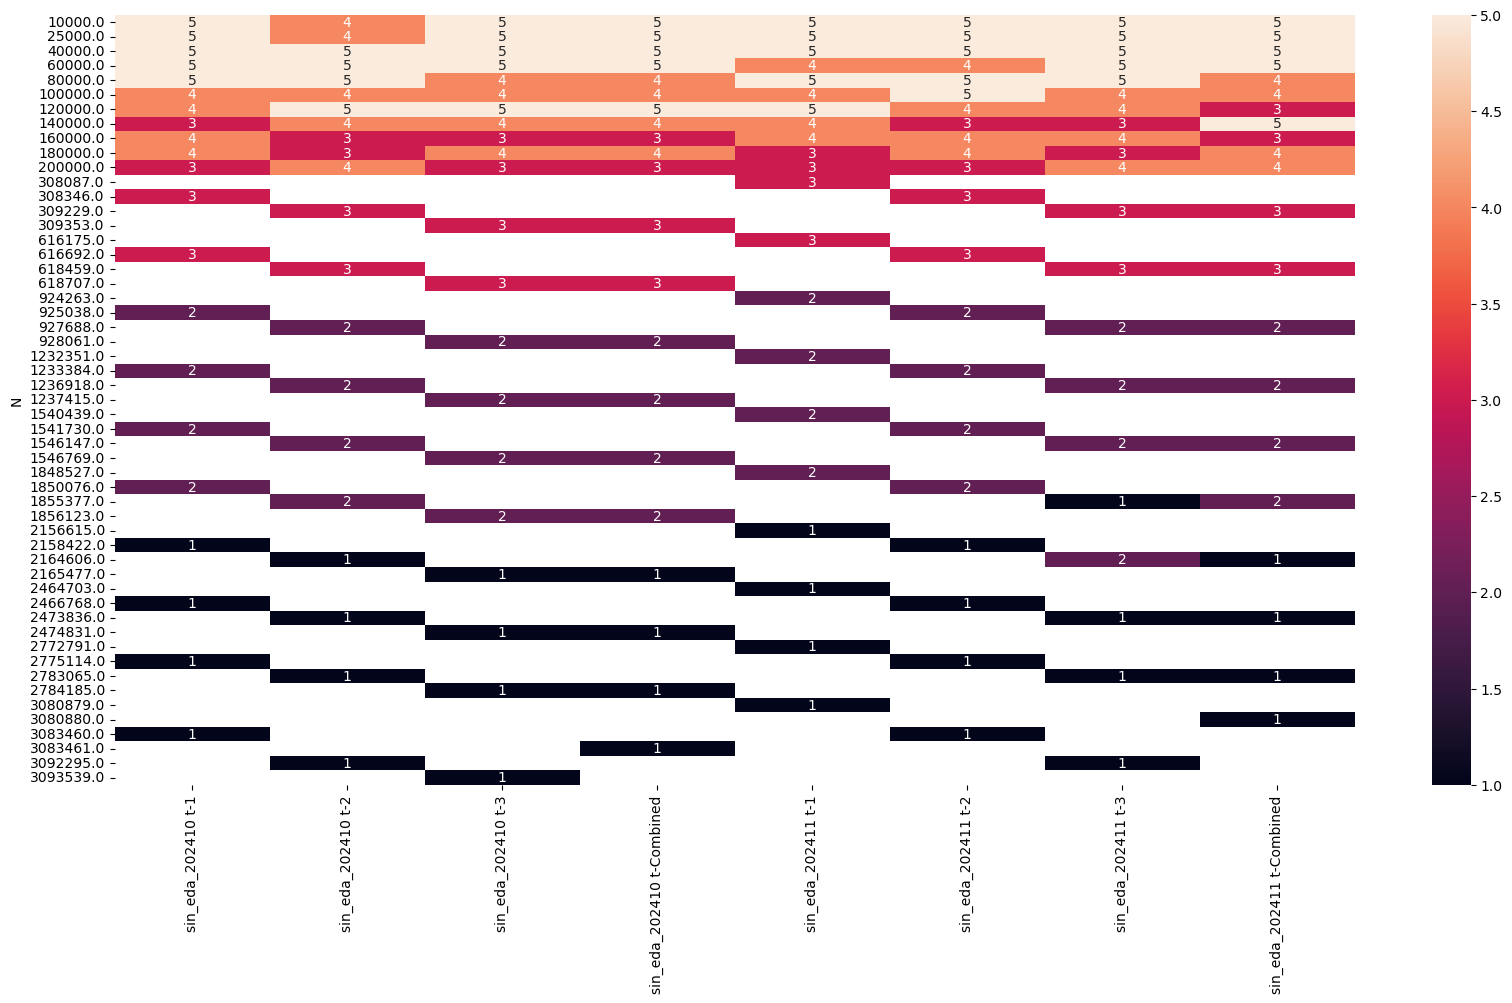

In [14]:
corte_modelo_360 = pd.DataFrame()
for ttt,save_backtesting in enumerate(backtesting_all):
    print(save_backtesting.keys())
    for t in  save_backtesting.keys():
        if ttt >=2:
            name = nametag_model[ttt]+' t-'+str(t)
            #if t == 1:
            df_tempo = save_backtesting[t]['modelo_360']
            df_tempo = df_tempo[['N','Aceleracion']].set_index('N').sort_index()
            df_tempo = df_tempo.rename(columns={'Aceleracion':name})
            corte_modelo_360 = pd.concat([corte_modelo_360,df_tempo],axis = 1)
corte_modelo_360 = corte_modelo_360.sort_index()
plt.figure(figsize=(20,10))
sns.heatmap(corte_modelo_360, annot = True, fmt = '0.1g')

In [15]:
corte_modelo_360

sin_eda_202410 t-1  sin_eda_202410 t-2  sin_eda_202410 t-3  \
N                                                                       
10000.0                   5.0                 4.0                 5.0   
25000.0                   5.0                 4.0                 5.0   
40000.0                   5.0                 5.0                 5.0   
60000.0                   5.0                 5.0                 5.0   
80000.0                   5.0                 5.0                 4.0   
100000.0                  4.0                 4.0                 4.0   
120000.0                  4.0                 5.0                 5.0   
140000.0                  3.0                 4.0                 4.0   
160000.0                  4.0                 3.0                 3.0   
180000.0                  4.0                 3.0                 4.0   
200000.0                  3.0                 4.0                 3.0   
308087.0                  NaN                 NaN                 NaN   
308346.0                  3.0                 NaN                 NaN   
309229.0                  NaN                 3.0                 NaN   
309353.0                  NaN                 NaN                 3.0   
616175.0                  NaN                 NaN                 NaN   
616692.0                  3.0                 NaN                 NaN   
618459.0                  NaN                 3.0                 NaN   
618707.0                  NaN                 NaN                 3.0   
924263.0                  NaN                 NaN                 NaN   
925038.0                  2.0                 NaN                 NaN   
927688.0                  NaN                 2.0                 NaN   
928061.0                  NaN                 NaN                 2.0   
1232351.0                 NaN                 NaN                 NaN   
1233384.0                 2.0                 NaN                 NaN   
1236918.0                 NaN                 2.0                 NaN   
1237415.0                 NaN                 NaN                 2.0   
1540439.0                 NaN                 NaN                 NaN   
1541730.0                 2.0                 NaN                 NaN   
1546147.0                 NaN                 2.0                 NaN   
1546769.0                 NaN                 NaN                 2.0   
1848527.0                 NaN                 NaN                 NaN   
1850076.0                 2.0                 NaN                 NaN   
1855377.0                 NaN                 2.0                 NaN   
1856123.0                 NaN                 NaN                 2.0   
2156615.0                 NaN                 NaN                 NaN   
2158422.0                 1.0                 NaN                 NaN   
2164606.0                 NaN                 1.0                 NaN   
2165477.0                 NaN                 NaN                 1.0   
2464703.0                 NaN                 NaN                 NaN   
2466768.0                 1.0                 NaN                 NaN   
2473836.0                 NaN                 1.0                 NaN   
2474831.0                 NaN                 NaN                 1.0   
2772791.0                 NaN                 NaN                 NaN   
2775114.0                 1.0                 NaN                 NaN   
2783065.0                 NaN                 1.0                 NaN   
2784185.0                 NaN                 NaN                 1.0   
3080879.0                 NaN                 NaN                 NaN   
3080880.0                 NaN                 NaN                 NaN   
3083460.0                 1.0                 NaN                 NaN   
3083461.0                 NaN                 NaN                 NaN   
3092295.0                 NaN                 1.0                 NaN   
3093539.0                 NaN                 NaN                 1.0

In [16]:
ttt = 3
obs_order = 924263.0
nametag_model[ttt]

'sin_eda_202411'

In [17]:
df_tempo = backtesting_all[ttt][1]['modelo_360']
if np.isnan(df_tempo.loc[0,'pend']) == True:
    df_tempo.loc[0,'pend'] = df_tempo.loc[0,'Aciertos'] /df_tempo.loc[0,'N']
df_temp = df_tempo[df_tempo['N']<=obs_order]
df_temp['Aceleracion'] = backtesting.deciles_func(df_temp['pend'], 5)
df_temp1 = df_tempo[df_tempo['N']>obs_order]
df_temp1.loc[df_temp1.index,'Aceleracion'] = 1
df_temp = pd.concat([df_temp,df_temp1], axis = 0)
df_temp

[12/20/24 16:25:39] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=920594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=435670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 5                                                     ]8;id=628180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=203993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    WARNING  /tmp/ipykernel_1970/1675877078.py:5: SettingWithCopyWarning:           ]8;id=201326;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=41726;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df_temp['Aceleracion'] = backtesting.deciles_func(df_temp['pend'],                  
                             5)                                                                                    
                                                                                                                   

N  Aciertos      pend  Aceleracion
0     10000.0     269.0  0.026900          5.0
1     25000.0     578.0  0.020600          5.0
2     40000.0     874.0  0.019733          5.0
3     60000.0    1209.0  0.016750          4.0
4     80000.0    1577.0  0.018400          4.0
5    100000.0    1911.0  0.016700          3.0
6    120000.0    2255.0  0.017200          4.0
7    140000.0    2587.0  0.016600          3.0
8    160000.0    2890.0  0.015150          2.0
9    180000.0    3181.0  0.014550          2.0
10   200000.0    3460.0  0.013950          2.0
11   308087.0    4691.0  0.011389          1.0
12   616175.0    7529.0  0.009212          1.0
13   924263.0    9409.0  0.006102          1.0
14  1232351.0   10671.0  0.004096          1.0
15  1540439.0   11994.0  0.004294          1.0
16  1848527.0   13188.0  0.003876          1.0
17  2156615.0   14161.0  0.003158          1.0
18  2464703.0   14923.0  0.002473          1.0
19  2772791.0   15701.0  0.002525          1.0
20  3080879.0   16457.0  0.002454          1.0

df_temp.to_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/AH/09-backtesting/curva_efec.parquet')

In [20]:
pd.read_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/AH/09-backtesting/curva_efec.parquet')

N  Aciertos      pend  Aceleracion
0     10000.0     269.0  0.026900          5.0
1     25000.0     578.0  0.020600          5.0
2     40000.0     874.0  0.019733          5.0
3     60000.0    1209.0  0.016750          4.0
4     80000.0    1577.0  0.018400          4.0
5    100000.0    1911.0  0.016700          3.0
6    120000.0    2255.0  0.017200          4.0
7    140000.0    2587.0  0.016600          3.0
8    160000.0    2890.0  0.015150          2.0
9    180000.0    3181.0  0.014550          2.0
10   200000.0    3460.0  0.013950          2.0
11   308087.0    4691.0  0.011389          1.0
12   616175.0    7529.0  0.009212          1.0
13   924263.0    9409.0  0.006102          1.0
14  1232351.0   10671.0  0.004096          1.0
15  1540439.0   11994.0  0.004294          1.0
16  1848527.0   13188.0  0.003876          1.0
17  2156615.0   14161.0  0.003158          1.0
18  2464703.0   14923.0  0.002473          1.0
19  2772791.0   15701.0  0.002525          1.0
20  3080879.0   16457.0  0.002454          1.0